In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [ ]:
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 1


In [ ]:
df_gram=pd.read_csv('/content/drive/MyDrive/Agri Dataset ISI/merged_gram_reservoir.csv')
df_gram.head()

state_name crop_name  apy_item_interval_start  \
0  Andhra Pradesh      gram                     2000   
1  Andhra Pradesh      gram                     2000   
2  Andhra Pradesh      gram                     2000   
3  Andhra Pradesh      gram                     2000   
4  Andhra Pradesh      gram                     2000   

  temperature_recorded_date  state_temperature_max_val  \
0                2000-01-01                      30.38   
1                2000-01-02                      30.04   
2                2000-01-03                      29.92   
3                2000-01-04                      29.98   
4                2000-01-05                      29.77   

   state_temperature_min_val  state_rainfall_val    yield         FRL  \
0                      14.47                 0.0  1.22615  152.296667   
1                      13.96                 0.0  1.22615  152.296667   
2                      12.98                 0.0  1.22615  152.296667   
3                      12.23                 0.0  1.22615  152.296667   
4                      13.24                 0.0  1.22615  152.296667   

   Live Cap FRL   Level  Current Live Storage  
0      2.838333  266.30                 6.390  
1      2.838333  266.18                 6.330  
2      2.838333  266.09                 6.286  
3      2.838333  266.03                 6.257  
4      2.838333  265.97                 6.228

In [ ]:
df_gram.isnull().sum()

state_name                     0
crop_name                      0
apy_item_interval_start        0
temperature_recorded_date      0
state_temperature_max_val      0
state_temperature_min_val      0
state_rainfall_val             0
yield                          0
FRL                            0
Live Cap FRL                   0
Level                        400
Current Live Storage         397
dtype: int64

In [ ]:
df_gram['temperature_recorded_date'] = pd.to_datetime(df_gram['temperature_recorded_date'])
df_gram['dayofyear'] = df_gram['temperature_recorded_date'].dt.dayofyear
df_gram['year'] = df_gram['apy_item_interval_start']

In [ ]:
df_gram.head()

state_name crop_name  apy_item_interval_start  \
0  Andhra Pradesh      gram                     2000   
1  Andhra Pradesh      gram                     2000   
2  Andhra Pradesh      gram                     2000   
3  Andhra Pradesh      gram                     2000   
4  Andhra Pradesh      gram                     2000   

  temperature_recorded_date  state_temperature_max_val  \
0                2000-01-01                      30.38   
1                2000-01-02                      30.04   
2                2000-01-03                      29.92   
3                2000-01-04                      29.98   
4                2000-01-05                      29.77   

   state_temperature_min_val  state_rainfall_val    yield         FRL  \
0                      14.47                 0.0  1.22615  152.296667   
1                      13.96                 0.0  1.22615  152.296667   
2                      12.98                 0.0  1.22615  152.296667   
3                      12.23                 0.0  1.22615  152.296667   
4                      13.24                 0.0  1.22615  152.296667   

   Live Cap FRL   Level  Current Live Storage  dayofyear  year  
0      2.838333  266.30                 6.390          1  2000  
1      2.838333  266.18                 6.330          2  2000  
2      2.838333  266.09                 6.286          3  2000  
3      2.838333  266.03                 6.257          4  2000  
4      2.838333  265.97                 6.228          5  2000

In [ ]:
df_gram.drop(['crop_name',],axis=1,inplace=True)
df_gram.head()

state_name  apy_item_interval_start temperature_recorded_date  \
0  Andhra Pradesh                     2000                2000-01-01   
1  Andhra Pradesh                     2000                2000-01-02   
2  Andhra Pradesh                     2000                2000-01-03   
3  Andhra Pradesh                     2000                2000-01-04   
4  Andhra Pradesh                     2000                2000-01-05   

   state_temperature_max_val  state_temperature_min_val  state_rainfall_val  \
0                      30.38                      14.47                 0.0   
1                      30.04                      13.96                 0.0   
2                      29.92                      12.98                 0.0   
3                      29.98                      12.23                 0.0   
4                      29.77                      13.24                 0.0   

     yield         FRL  Live Cap FRL   Level  Current Live Storage  dayofyear  \
0  1.22615  152.296667      2.838333  266.30                 6.390          1   
1  1.22615  152.296667      2.838333  266.18                 6.330          2   
2  1.22615  152.296667      2.838333  266.09                 6.286          3   
3  1.22615  152.296667      2.838333  266.03                 6.257          4   
4  1.22615  152.296667      2.838333  265.97                 6.228          5   

   year  
0  2000  
1  2000  
2  2000  
3  2000  
4  2000

In [ ]:
df_gram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107753 entries, 0 to 107752
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   state_name                 107753 non-null  object        
 1   apy_item_interval_start    107753 non-null  int64         
 2   temperature_recorded_date  107753 non-null  datetime64[ns]
 3   state_temperature_max_val  107753 non-null  float64       
 4   state_temperature_min_val  107753 non-null  float64       
 5   state_rainfall_val         107753 non-null  float64       
 6   yield                      107753 non-null  float64       
 7   FRL                        107753 non-null  float64       
 8   Live Cap FRL               107753 non-null  float64       
 9   Level                      107353 non-null  float64       
 10  Current Live Storage       107356 non-null  float64       
 11  dayofyear                  107753 non-null  int32   

In [ ]:
df_gram.describe()

apy_item_interval_start      temperature_recorded_date  \
count            107753.000000                         107753   
mean               2011.026338  2011-07-11 21:03:43.010032384   
min                2000.000000            2000-01-01 00:00:00   
25%                2005.000000            2005-07-08 00:00:00   
50%                2011.000000            2011-08-17 00:00:00   
75%                2017.000000            2017-05-27 00:00:00   
max                2022.000000            2022-12-31 00:00:00   
std                   6.702545                            NaN   

       state_temperature_max_val  state_temperature_min_val  \
count              107753.000000              107753.000000   
mean                   34.229723                  17.545032   
min                    11.110000                  -0.500000   
25%                    31.530000                  13.430000   
50%                    33.830000                  19.030000   
75%                    37.220000                  22.120000   
max                    47.980000                  28.920000   
std                     4.791435                   5.663110   

       state_rainfall_val          yield            FRL   Live Cap FRL  \
count       107753.000000  107753.000000  107753.000000  107753.000000   
mean             3.062650       0.937949     332.996985       1.499350   
min              0.000000       0.252000      99.941215       0.147251   
25%              0.000000       0.721590     183.210000       0.702773   
50%              0.150000       0.904240     348.926000       1.365667   
75%              3.150000       1.135840     424.342000       1.916750   
max            186.990000       1.907610     597.731875       2.898000   
std              6.576712       0.300997     149.166839       0.856727   

               Level  Current Live Storage      dayofyear           year  
count  107353.000000         107356.000000  107753.000000  107753.000000  
mean      319.011712              0.777880     183.132470    2011.026338  
min        50.480000              0.000000       1.000000    2000.000000  
25%       177.137438              0.272000      92.000000    2005.000000  
50%       293.740500              0.562426     183.000000    2011.000000  
75%       409.433800              1.032553     274.000000    2017.000000  
max      1074.544444              6.390000     366.000000    2022.000000  
std       145.082895              0.721199     105.443307       6.702545

array([[<Axes: title={'center': 'state_temperature_max_val'}>,
        <Axes: title={'center': 'state_temperature_min_val'}>,
        <Axes: title={'center': 'state_rainfall_val'}>],
       [<Axes: title={'center': 'yield'}>,
        <Axes: title={'center': 'FRL'}>,
        <Axes: title={'center': 'Live Cap FRL'}>],
       [<Axes: title={'center': 'Level'}>,
        <Axes: title={'center': 'Current Live Storage'}>, <Axes: >]],
      dtype=object)

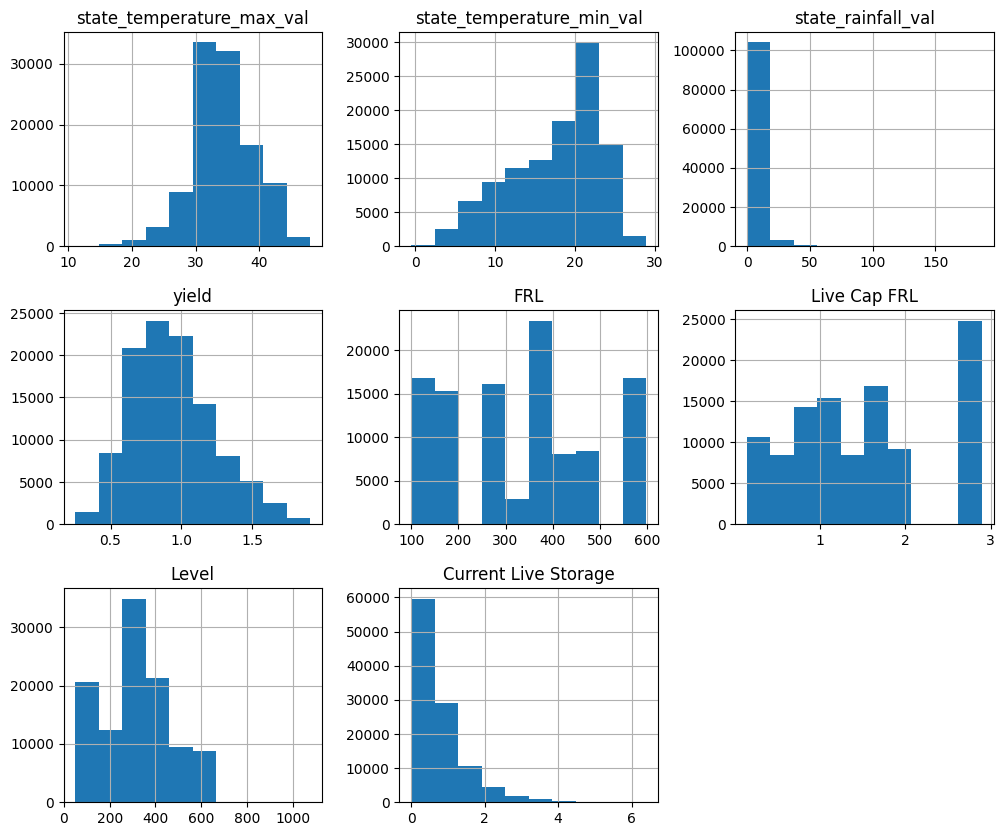

In [ ]:
num_cols = ['state_temperature_max_val', 'state_temperature_min_val', 'state_rainfall_val',
            'yield', 'FRL', 'Live Cap FRL', 'Level', 'Current Live Storage']

df_gram[num_cols].hist(figsize=(12,10))


<Axes: >

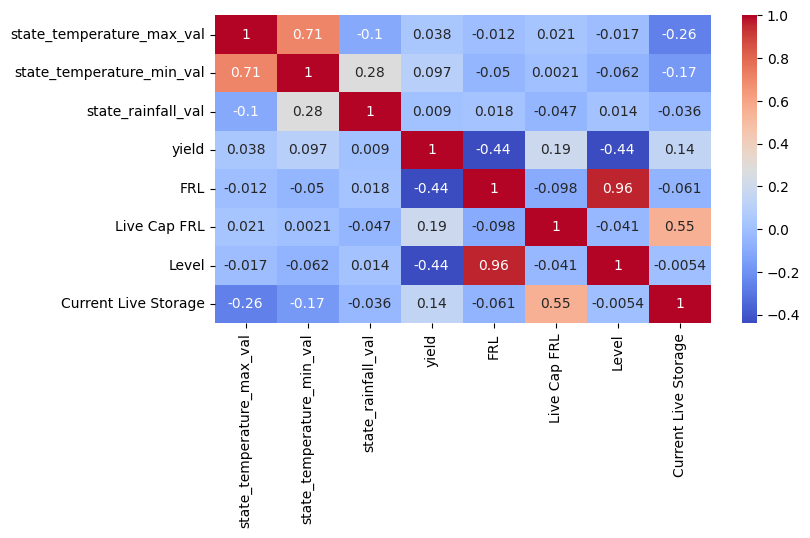

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df_gram[num_cols].corr(), annot=True, cmap='coolwarm')


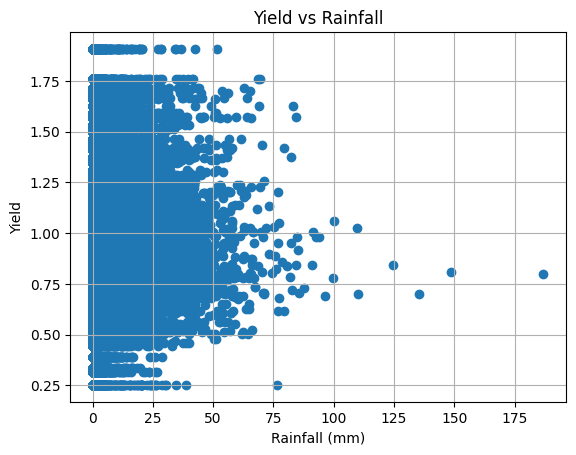

In [ ]:
plt.scatter(df_gram['state_rainfall_val'],df_gram['yield'])
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield')
plt.title('Yield vs Rainfall')
plt.grid(True)
plt.show()

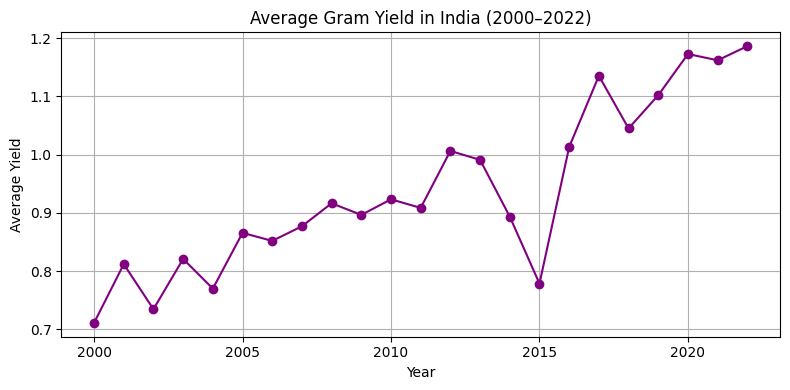

In [ ]:
# Filter data for years 2000 to 2022
df_filtered_gram = df_gram[(df_gram['apy_item_interval_start'] >= 2000) & (df_gram['apy_item_interval_start'] <= 2022)]

# Group by year and get average yield
df_yearly_yield = df_filtered_gram.groupby('apy_item_interval_start', as_index=False)['yield'].mean()

plt.figure(figsize=(8, 4))
plt.plot(df_yearly_yield['apy_item_interval_start'], df_yearly_yield['yield'], color='purple', marker='o', linestyle='-')
plt.title('Average Gram Yield in India (2000–2022)')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

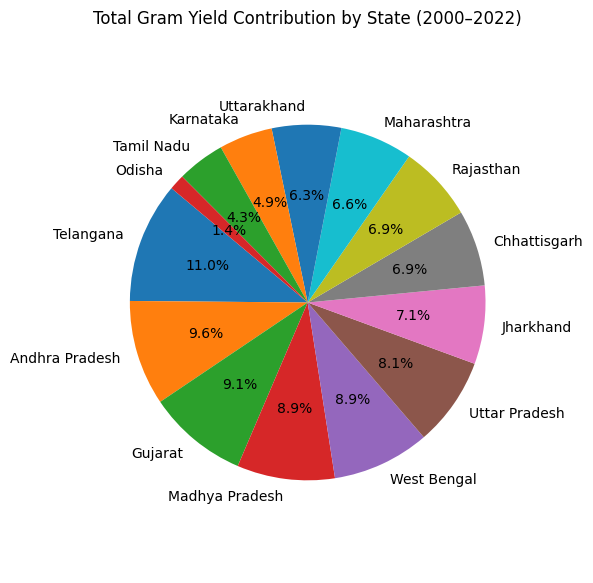

In [ ]:
state_yield_sum_gram = df_filtered_gram.groupby('state_name')['yield'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(state_yield_sum_gram, labels=state_yield_sum_gram.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Gram Yield Contribution by State (2000–2022)')
plt.axis('equal')
plt.tight_layout()
plt.show()

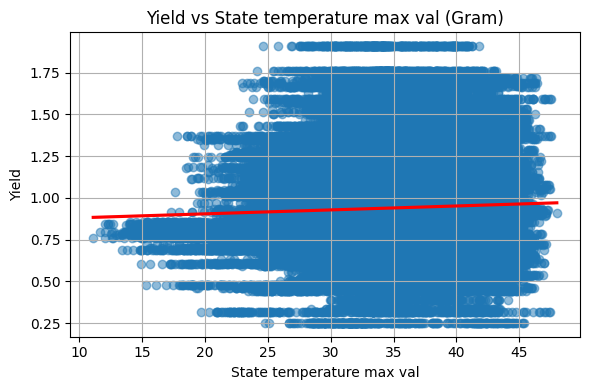

Correlation between state_temperature_max_val and yield: 0.038


In [ ]:
gram_feature_col = 'state_temperature_max_val'
gram_target_col = 'yield'

# Drop missing values
df_gram_temp_yield = df_gram[[gram_feature_col, gram_target_col]].dropna()

# Scatter + Regression Line
plt.figure(figsize=(6, 4))
sns.regplot(x=gram_feature_col, y=gram_target_col, data=df_gram_temp_yield,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'{gram_target_col.capitalize()} vs {gram_feature_col.replace("_", " ").capitalize()} (Gram)')
plt.xlabel(gram_feature_col.replace('_', ' ').capitalize())
plt.ylabel(gram_target_col.capitalize())
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = df_gram_temp_yield[gram_feature_col].corr(df_gram_temp_yield[gram_target_col])
print(f"Correlation between {gram_feature_col} and {gram_target_col}: {correlation:.3f}")

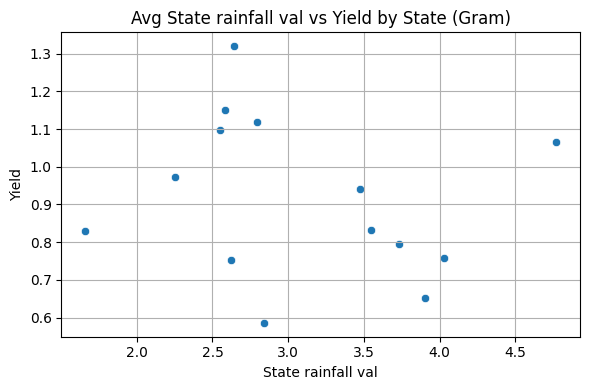

Correlation between state rainfall val and yield: -0.193


In [ ]:
# Define feature and target
gram_feature_col2 = 'state_rainfall_val'
gram_target_col = 'yield'

# Group by state and get averages
# Assuming df_gram is your DataFrame for gram data
state_avg_gram = df_gram.groupby('state_name')[[gram_feature_col2, gram_target_col]].mean().dropna()

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=gram_feature_col2, y=gram_target_col, data=state_avg_gram)
plt.title(f'Avg {gram_feature_col2.replace("_", " ").capitalize()} vs {gram_target_col.capitalize()} by State (Gram)')
plt.xlabel(gram_feature_col2.replace('_', ' ').capitalize())
plt.ylabel(gram_target_col.capitalize())
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = state_avg_gram[gram_feature_col2].corr(state_avg_gram[gram_target_col])
print(f"Correlation between {gram_feature_col2.replace('_', ' ')} and {gram_target_col}: {correlation:.3f}")

In [ ]:
df_gram[(df_gram['year'] == 2015)].isnull().sum()

state_name                     0
apy_item_interval_start        0
temperature_recorded_date      0
state_temperature_max_val      0
state_temperature_min_val      0
state_rainfall_val             0
yield                          0
FRL                            0
Live Cap FRL                   0
Level                        111
Current Live Storage         111
dayofyear                      0
year                           0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers import LeakyReLU, ReLU, PReLU, ELU
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler


**Experiment**

In [ ]:
states = df_gram['state_name'].unique()
state_scores = []
for state in states:
    state_df = df_gram[df_gram['state_name'] == state].dropna()

    # Define features and target
    X = state_df[['state_temperature_max_val','state_temperature_min_val','state_rainfall_val','FRL','Live Cap FRL','Current Live Storage','Level']]
    y = state_df['yield']

    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    scaler_y=MinMaxScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)



In [ ]:
X_train_scaled.shape

(6639, 7)

In [ ]:
state_scores = []
for state in states:
    model_1 = Sequential()
    model_1.add(Dense(1660, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model_1.add(Dropout(0.4))
    model_1.add(Dense(384, activation='relu'))
    model_1.add(Dropout(0.4))
    model_1.add(Dense(64, activation='relu'))
    model_1.add(Dense(1))

    optimizer = RMSprop(learning_rate=0.001166260806199092)
    model_1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    history_1 = model_1.fit(X_train_scaled, y_train_scaled, epochs=150, batch_size=50,
                            validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',patience=20,restore_best_weights=True)])
    y_pred = model_1.predict(X_test_scaled).flatten()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    # Store actual vs predicted as mean of test samples
    actual_mean = y_test.mean()
    predicted_mean = np.mean(y_pred)

    print(f"State: {state} | RMSE: {rmse:.2f} | R²: {r2:.3f}")
    state_scores.append({
        'State': state,
        'RMSE': rmse,
        'R2': r2,
        'Actual_Yield': actual_mean,
        'Predicted_Yield': predicted_mean,
    })

Epoch 1/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - loss: 0.1057 - mae: 0.2511 - val_loss: 0.0687 - val_mae: 0.2078
Epoch 2/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0662 - mae: 0.2073 - val_loss: 0.0707 - val_mae: 0.2187
Epoch 3/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0613 - mae: 0.2010 - val_loss: 0.0643 - val_mae: 0.2074
Epoch 4/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0636 - mae: 0.2048 - val_loss: 0.0600 - val_mae: 0.1986
Epoch 5/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0580 - mae: 0.1949 - val_loss: 0.0658 - val_mae: 0.2071
Epoch 6/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0590 - mae: 0.1952 - val_loss: 0.0589 - val_mae: 0.1969
Epoch 7/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0565 - mae: 0.1917 - val_loss: 0.0611 - val_mae: 0.2008
Epoch 8/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0565 - mae: 0.1922 - val_loss: 0.0550 - val_mae: 0.1894
Epoch 9/150
120/120 ━━━━━━━━━━━━━━━━━━━━ 2s 7m

In [ ]:
results_df = pd.DataFrame(state_scores)
print(results_df)

             State      RMSE        R2  Actual_Yield  Predicted_Yield
0   Andhra Pradesh  0.116037  0.550607      1.067169         1.064435
1     Chhattisgarh  0.123865  0.487932      1.067169         1.068291
2          Gujarat  0.119840  0.520666      1.067169         1.072419
3        Jharkhand  0.122651  0.497922      1.067169         1.072787
4        Karnataka  0.125686  0.472765      1.067169         1.066908
5   Madhya Pradesh  0.128263  0.450917      1.067169         1.061033
6      Maharashtra  0.117524  0.539020      1.067169         1.068807
7           Odisha  0.123329  0.492354      1.067169         1.065131
8        Rajasthan  0.117943  0.535722      1.067169         1.068408
9       Tamil Nadu  0.121015  0.511223      1.067169         1.076361
10       Telangana  0.117691  0.537708      1.067169         1.068578
11     Uttarakhand  0.120770  0.513202      1.067169         1.068321
12   Uttar Pradesh  0.119767  0.521251      1.067169         1.059243
13     West Bengal  

In [ ]:
X.head()

state_temperature_max_val  state_temperature_min_val  \
99352                      24.41                       7.67   
99353                      24.58                       8.12   
99354                      24.83                       7.86   
99355                      26.60                       7.96   
99356                      24.30                       6.93   

       state_rainfall_val         FRL  Live Cap FRL  Current Live Storage  \
99352                 0.0  135.136667         0.523              0.643000   
99353                 0.0  135.136667         0.523              0.642667   
99354                 0.0  135.136667         0.523              0.642000   
99355                 0.0  135.136667         0.523              0.642000   
99356                 0.0  135.136667         0.523              0.641000   

            Level  
99352  136.353333  
99353  136.350000  
99354  136.343333  
99355  136.343333  
99356  136.333333

In [ ]:
X_test_scaled.shape

(1660, 7)

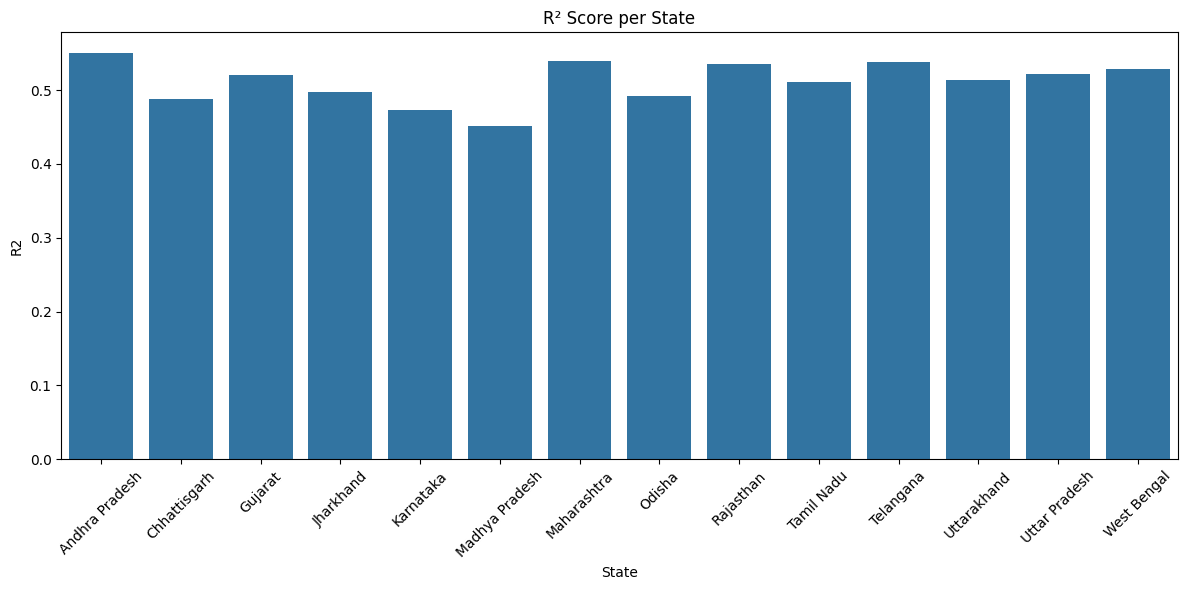

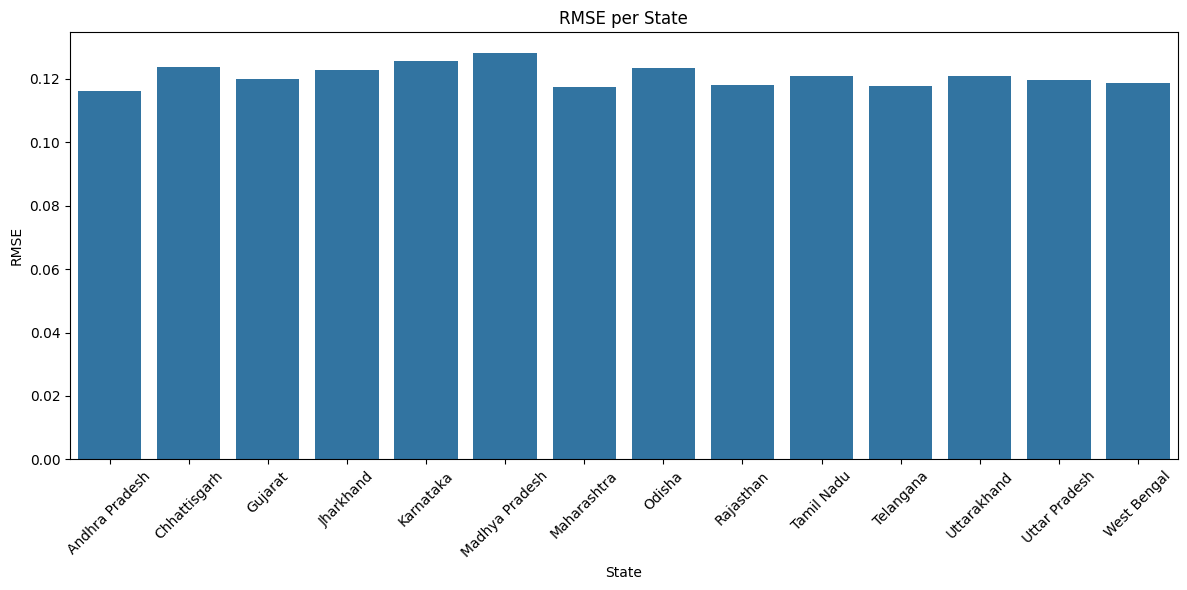

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='R2', data=results_df)
plt.xticks(rotation=45)
plt.title('R² Score per State')
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='RMSE', data=results_df)
plt.xticks(rotation=45)
plt.title('RMSE per State')
plt.tight_layout()
plt.show()


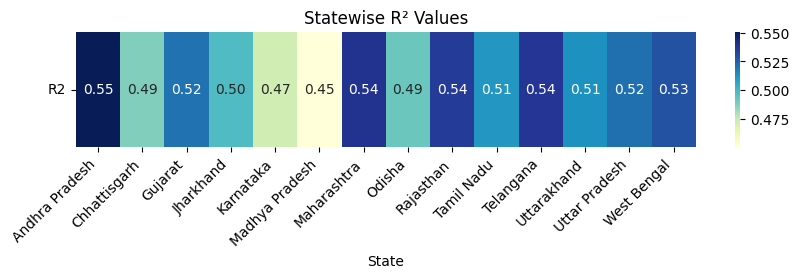

In [ ]:
plt.figure(figsize=(10, 1.5))
heatmap_data = results_df.set_index("State")[["R2"]].T
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title("Statewise R² Values")
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
history_1.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

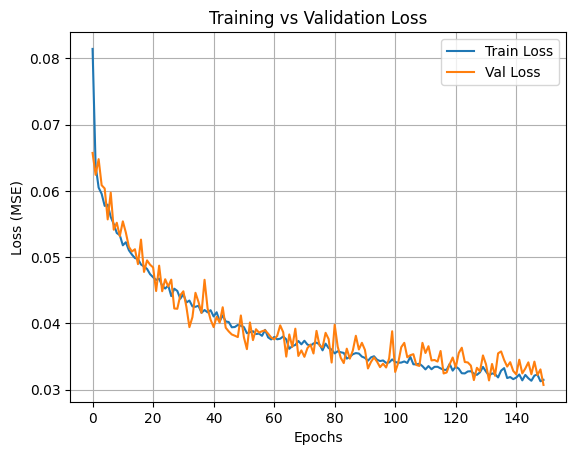

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_1.history['loss'], label='Train Loss')
plt.plot(history_1.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

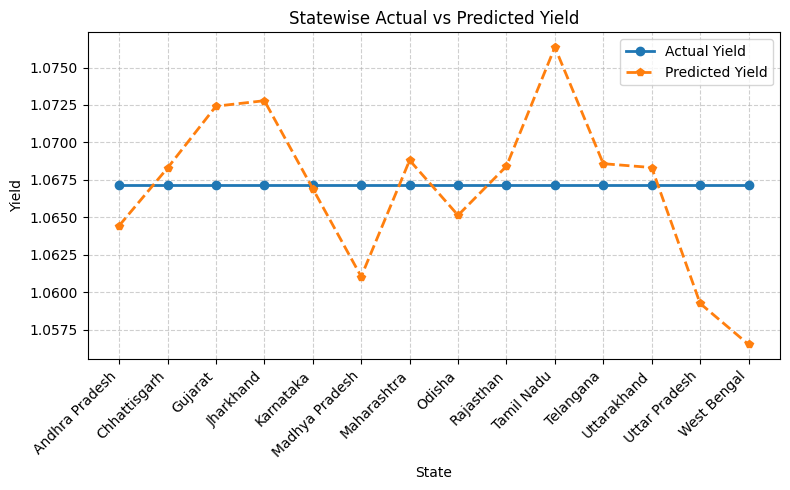

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(results_df['State'], results_df['Actual_Yield'], label='Actual Yield', marker='o', linewidth=2)
plt.plot(results_df['State'], results_df['Predicted_Yield'], label='Predicted Yield', marker='p', linewidth=2, linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Yield')
plt.title('Statewise Actual vs Predicted Yield')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.6 MB/s eta 0:00:00


# tuner


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(hp):
    model = Sequential()

    # Number of hidden layers (1 to 3)
    for i in range(hp.Int('num_layers', 1, 3)):
        units = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
        activation = hp.Choice(f'act_{i}', ['relu', 'tanh', 'selu'])

        model.add(Dense(units=units, activation=activation))

        if hp.Boolean(f'dropout_{i}'):
            model.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', 0.1, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(1))

    # Choose optimizer and learning rate
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop'])
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=lr)
    else:
        optimizer = RMSprop(learning_rate=lr)

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='ann_tuning',
    project_name='yield_model',
    overwrite=True
)


In [ ]:
tuner.search(X_train_scaled, y_train_scaled,
             epochs=50,
             validation_split=0.2,
             batch_size=64,
             verbose=1)


Trial 10 Complete [00h 00m 43s]
val_loss: 0.05293280631303787

Best val_loss So Far: 0.04480678774416447
Total elapsed time: 00h 08m 11s


In [ ]:
best_hp = tuner.get_best_hyperparameters(1)[0]

print("Best hyperparameters:")
for key in best_hp.values.keys():
    print(f"{key}: {best_hp.get(key)}")

Best hyperparameters:
num_layers: 3
units_0: 384
act_0: tanh
dropout_0: False
optimizer: rmsprop
learning_rate: 0.0006166410337625183
units_1: 32
act_1: relu
dropout_1: False
units_2: 32
act_2: relu
dropout_2: False


# New Section

In [ ]:
def build_final_model(best_hp, input_shape):
    """Build model using best hyperparameters"""
    model_2 = Sequential()

    # Add layers based on best hyperparameters
    for i in range(best_hp.get('num_layers')):
        model_2.add(Dense(
            units=best_hp.get(f'units_{i}'),
            activation=best_hp.get(f'act_{i}'),
            input_shape=(input_shape,) if i == 0 else None
        ))

        # Add dropout if specified
        if best_hp.get(f'dropout_{i}'):
            model_2.add(Dropout(rate=best_hp.get(f'dropout_rate_{i}')))

    # Output layer
    model_2.add(Dense(1))

    # Configure optimizer
    optimizer_choice = best_hp.get('optimizer')
    lr = best_hp.get('learning_rate')

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=lr)
    else:
        optimizer = RMSprop(learning_rate=lr)

    model_2.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model_2

# Train final models for each state
states = df_gram['state_name'].unique()
final_results = []

for state in states:
    print(f"Training final model for: {state}")

    # Prepare data for this state
    state_df = df_gram[df_gram['state_name'] == state].dropna()

    # Define features and target
    X = state_df[['state_temperature_max_val','state_temperature_min_val',
                  'state_rainfall_val','FRL','Live Cap FRL','Current Live Storage','Level']]
    y = state_df['yield']

    # Split and scale
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    scaler_y = MinMaxScaler()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

    # Build final model with best hyperparameters
    final_model = build_final_model(best_hp, X_train_scaled.shape[1])

    # Train the final model
    history_2 = final_model.fit(
        X_train_scaled, y_train_scaled,
        epochs=100,
        batch_size=50,
        validation_split=0.2,
        callbacks=[EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)],
        verbose=1
    )

    # Make predictions and evaluate
    y_pred_scaled = final_model.predict(X_test_scaled)
    y_pred = scaler_y.inverse_transform(y_pred_scaled).flatten()

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    actual_mean = y_test.mean()
    predicted_mean = np.mean(y_pred)

    print(f"State: {state} | RMSE: {rmse:.2f} | R²: {r2:.3f}")
    final_results.append({
        'State': state,
        'RMSE': rmse,
        'R2': r2,
        'Actual_Yield': actual_mean,
        'Predicted_Yield': predicted_mean,
    })

    # Save the final model
   # final_model.save(f'final_model_{state.replace(" ", "_")}.h5')

print("\nFinal model training completed!")
#print("Models saved as .h5 files")

Training final model for: Andhra Pradesh
Epoch 1/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0867 - mae: 0.2204 - val_loss: 0.0465 - val_mae: 0.1668
Epoch 2/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0357 - mae: 0.1445 - val_loss: 0.0347 - val_mae: 0.1402
Epoch 3/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0350 - mae: 0.1410 - val_loss: 0.0323 - val_mae: 0.1358
Epoch 4/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0325 - mae: 0.1376 - val_loss: 0.0360 - val_mae: 0.1450
Epoch 5/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0335 - mae: 0.1383 - val_loss: 0.0349 - val_mae: 0.1424
Epoch 6/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0313 - mae: 0.1331 - val_loss: 0.0336 - val_mae: 0.1422
Epoch 7/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0311 - mae: 0.1345 - val_loss: 0.0314 - val_mae: 0.1350
Epoch 8/100
108/108 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0313 - mae: 0.1344 - val_loss: 0.0357 - val_mae: 0.1486
Epoch 

In [ ]:
final_results_df = pd.DataFrame(final_results)
print(final_results_df)

NameError: name 'pd' is not defined

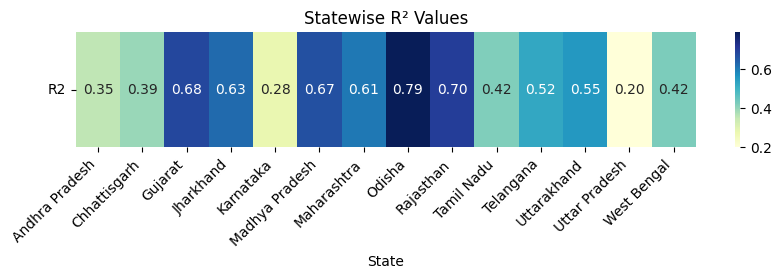

In [ ]:
plt.figure(figsize=(10, 1.5))
heatmap_data = final_results_df.set_index("State")[["R2"]].T
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title("Statewise R² Values")
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
history_2.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

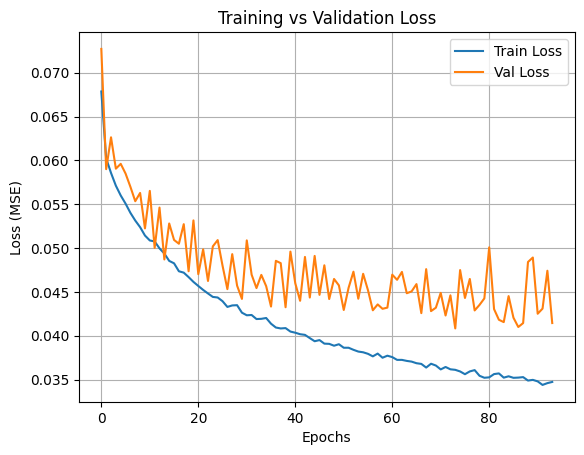

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

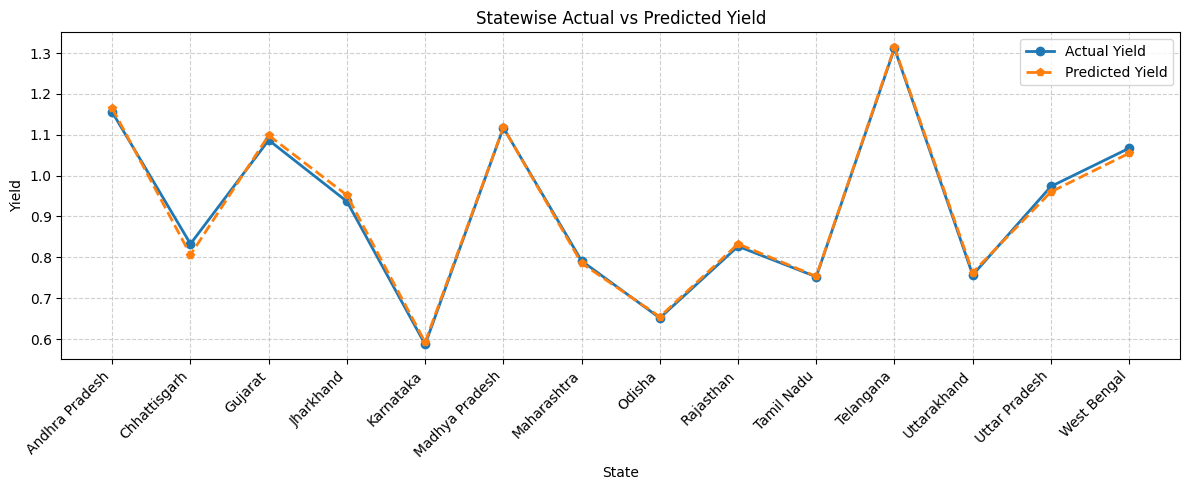

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(final_results_df['State'], final_results_df['Actual_Yield'], label='Actual Yield', marker='o', linewidth=2)
plt.plot(final_results_df['State'], final_results_df['Predicted_Yield'], label='Predicted Yield', marker='p', linewidth=2, linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Yield')
plt.title('Statewise Actual vs Predicted Yield')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
###3rd model

In [ ]:
state_scores_3rd = []
for state in states:
    model_3 = Sequential()
    model_3.add(Dense(441, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model_3.add(Dense(261, activation='relu',lora_rank=8))
    model_3.add(Dense(81, activation='relu'))
    model_3.add(Dense(1))

    optimizer = Adam(learning_rate=0.002)
    model_3.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    history_3 = model_3.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=128, validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss',patience=9,restore_best_weights=True)])
    y_pred = model_3.predict(X_test_scaled).flatten()
    y_pred = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"State: {state} | RMSE: {rmse:.2f} | R²: {r2:.3f}")
    state_scores_3rd.append({
        'State': state,
        'RMSE': rmse,
        'R2': r2
    })

Epoch 1/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - loss: 0.1024 - mae: 0.2549 - val_loss: 0.0609 - val_mae: 0.2012
Epoch 2/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0576 - mae: 0.1954 - val_loss: 0.0580 - val_mae: 0.1945
Epoch 3/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0529 - mae: 0.1859 - val_loss: 0.0582 - val_mae: 0.1950
Epoch 4/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0548 - mae: 0.1891 - val_loss: 0.0570 - val_mae: 0.1930
Epoch 5/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0529 - mae: 0.1847 - val_loss: 0.0546 - val_mae: 0.1893
Epoch 6/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0514 - mae: 0.1813 - val_loss: 0.0547 - val_mae: 0.1887
Epoch 7/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0488 - mae: 0.1757 - val_loss: 0.0524 - val_mae: 0.1803
Epoch 8/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0488 - mae: 0.1747 - val_loss: 0.0511 - val_mae: 0.1804
Epoch 9/100
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.04

In [ ]:
results_df_model3 = pd.DataFrame(state_scores_3rd)
print(results_df_model3)

             State      RMSE        R2
0   Andhra Pradesh  0.121969  0.503487
1     Chhattisgarh  0.116428  0.547571
2          Gujarat  0.114165  0.564991
3        Jharkhand  0.114214  0.564619
4        Karnataka  0.116677  0.545639
5   Madhya Pradesh  0.116997  0.543143
6      Maharashtra  0.119735  0.521511
7           Odisha  0.121805  0.504823
8        Rajasthan  0.122300  0.500786
9       Tamil Nadu  0.115649  0.553606
10       Telangana  0.119077  0.526755
11     Uttarakhand  0.116289  0.548656
12   Uttar Pradesh  0.118829  0.528721
13     West Bengal  0.117333  0.540512


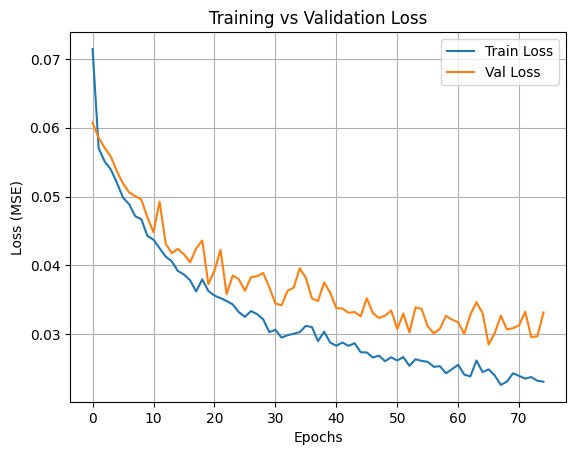

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_3.history['loss'], label='Train Loss')
plt.plot(history_3.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# RABI RICE

In [ ]:
df_rabi=pd.read_csv('/content/drive/MyDrive/Agri Dataset ISI/merged_rabi_rice_reservoir.csv')
df_rabi.head()

state_name crop_name  apy_item_interval_start  \
0  Andhra Pradesh      rice                     2000   
1  Andhra Pradesh      rice                     2000   
2  Andhra Pradesh      rice                     2000   
3  Andhra Pradesh      rice                     2000   
4  Andhra Pradesh      rice                     2000   

  temperature_recorded_date  state_temperature_max_val  \
0                2000-01-01                      30.38   
1                2000-01-02                      30.04   
2                2000-01-03                      29.92   
3                2000-01-04                      29.98   
4                2000-01-05                      29.77   

   state_temperature_min_val  state_rainfall_val    yield         FRL  \
0                      14.47                 0.0  3.58525  152.296667   
1                      13.96                 0.0  3.58525  152.296667   
2                      12.98                 0.0  3.58525  152.296667   
3                      12.23                 0.0  3.58525  152.296667   
4                      13.24                 0.0  3.58525  152.296667   

   Live Cap FRL   Level  Current Live Storage  
0      2.838333  266.30                 6.390  
1      2.838333  266.18                 6.330  
2      2.838333  266.09                 6.286  
3      2.838333  266.03                 6.257  
4      2.838333  265.97                 6.228

In [ ]:
df_rabi['state_name'].unique()

array(['Andhra Pradesh', 'Jharkhand', 'Karnataka', 'Telangana',
       'Uttarakhand'], dtype=object)

In [ ]:
df_rabi.isnull().sum()

state_name                   0
crop_name                    0
apy_item_interval_start      0
temperature_recorded_date    0
state_temperature_max_val    0
state_temperature_min_val    0
state_rainfall_val           0
yield                        0
FRL                          0
Live Cap FRL                 0
Level                        8
Current Live Storage         8
dtype: int64

<Axes: >

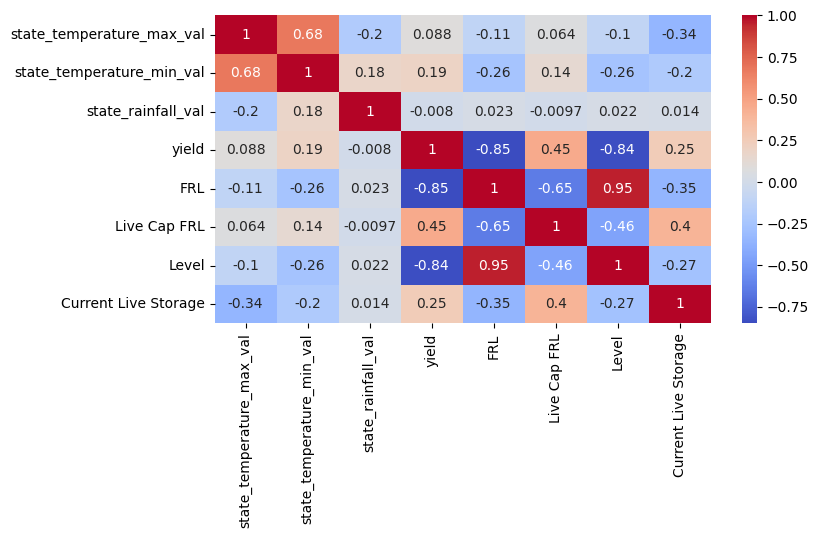

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df_rabi[num_cols].corr(), annot=True, cmap='coolwarm')

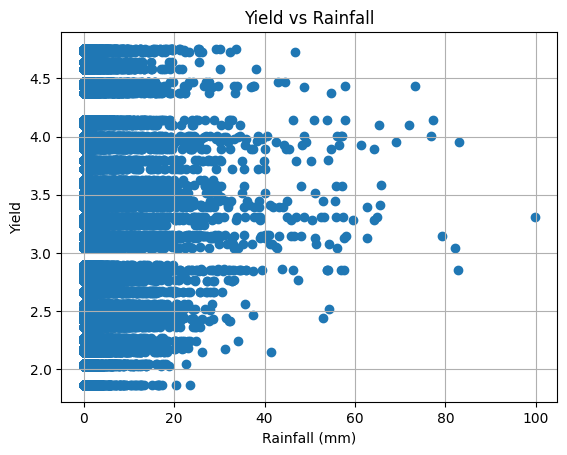

In [ ]:
plt.scatter(df_rabi['state_rainfall_val'],df_rabi['yield'])
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield')
plt.title('Yield vs Rainfall')
plt.grid(True)
plt.show()

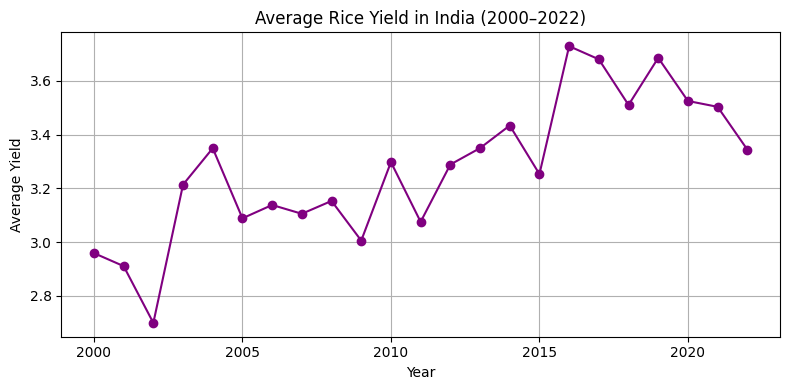

In [ ]:
# Filter data for years 2000 to 2022
df_filtered_rabi = df_rabi[(df_rabi['apy_item_interval_start'] >= 2000) & (df_rabi['apy_item_interval_start'] <= 2022)]

# Group by year and get average yield
df_yearly_rabi_yield = df_filtered_rabi.groupby('apy_item_interval_start', as_index=False)['yield'].mean()

plt.figure(figsize=(8, 4))
plt.plot(df_yearly_rabi_yield['apy_item_interval_start'], df_yearly_rabi_yield['yield'], color='purple', marker='o', linestyle='-')
plt.title('Average Rice Yield in India (2000–2022)')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

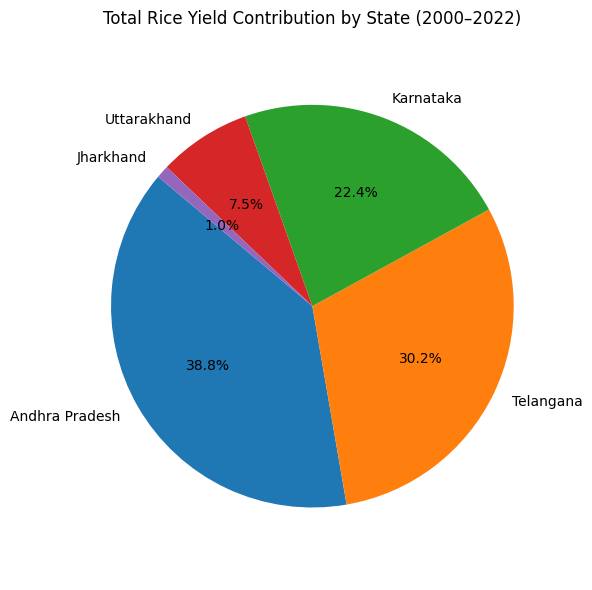

In [ ]:
state_yield_sum_rabi = df_filtered_rabi.groupby('state_name')['yield'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(state_yield_sum_rabi, labels=state_yield_sum_rabi.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Rice Yield Contribution by State (2000–2022)')
plt.axis('equal')
plt.tight_layout()
plt.show()

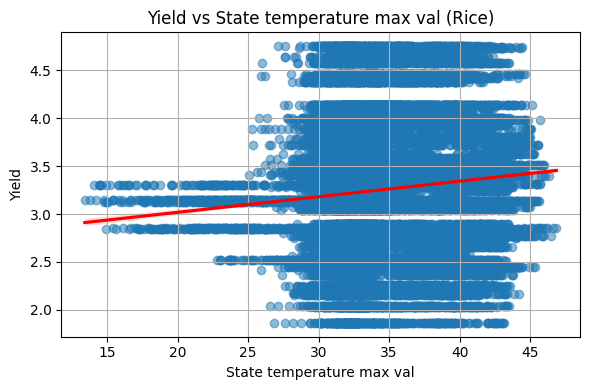

Correlation between state_temperature_max_val and yield: 0.088


In [ ]:
rabi_feature_col = 'state_temperature_max_val'
rabi_target_col = 'yield'

# Drop missing values
df_rabi_temp_yield = df_rabi[[rabi_feature_col, rabi_target_col]].dropna()

# Scatter + Regression Line
plt.figure(figsize=(6, 4))
sns.regplot(x=rabi_feature_col, y=rabi_target_col, data=df_rabi_temp_yield,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'{rabi_target_col.capitalize()} vs {rabi_feature_col.replace("_", " ").capitalize()} (Rice)')
plt.xlabel(rabi_feature_col.replace('_', ' ').capitalize())
plt.ylabel(rabi_target_col.capitalize())
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = df_rabi_temp_yield[rabi_feature_col].corr(df_rabi_temp_yield[rabi_target_col])
print(f"Correlation between {rabi_feature_col} and {rabi_target_col}: {correlation:.3f}")

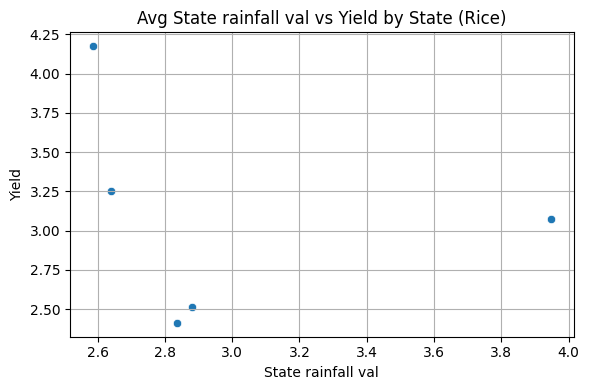

Correlation between state rainfall val and yield: -0.221


In [ ]:
# Define feature and target
rabi_feature_col2 = 'state_rainfall_val'
rabi_target_col = 'yield'

# Group by state and get averages
# Assuming df_rabi is your DataFrame for rabi data
state_avg_rabi = df_rabi.groupby('state_name')[[rabi_feature_col2, rabi_target_col]].mean().dropna()

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=rabi_feature_col2, y=rabi_target_col, data=state_avg_rabi)
plt.title(f'Avg {rabi_feature_col2.replace("_", " ").capitalize()} vs {rabi_target_col.capitalize()} by State (Rice)')
plt.xlabel(rabi_feature_col2.replace('_', ' ').capitalize())
plt.ylabel(rabi_target_col.capitalize())
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = state_avg_rabi[rabi_feature_col2].corr(state_avg_rabi[rabi_target_col])
print(f"Correlation between {rabi_feature_col2.replace('_', ' ')} and {rabi_target_col}: {correlation:.3f}")

In [ ]:
states_rabi = df_rabi['state_name'].unique()
state_scores_rabi = []
for state in states_rabi:
    state_df_rabi = df_rabi[df_rabi['state_name'] == state].dropna()

    # Define features and target
    X_rabi = state_df_rabi[['state_temperature_max_val','state_temperature_min_val','state_rainfall_val','FRL','Live Cap FRL','Current Live Storage','Level']]
    y_rabi = state_df_rabi['yield']

    # Split and scale
    X_train_rabi, X_test_rabi, y_train_rabi, y_test_rabi = train_test_split(X_rabi, y_rabi, test_size=0.2, random_state=42)
    scaler_rabi = StandardScaler()
    scaler_y_rabi=MinMaxScaler()

    X_train_scaled_rabi = scaler_rabi.fit_transform(X_train_rabi)
    X_test_scaled_rabi = scaler_rabi.transform(X_test_rabi)
    y_train_scaled_rabi = scaler_y_rabi.fit_transform(y_train_rabi.values.reshape(-1, 1))


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(hp):
    model_rabi = Sequential()

    # Number of hidden layers (1 to 3)
    for i in range(hp.Int('num_layers', 1, 3)):
        units_rabi = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
        activation_rabi = hp.Choice(f'act_{i}', ['relu', 'tanh', 'selu'])

        model_rabi.add(Dense(units=units_rabi, activation=activation_rabi))

        if hp.Boolean(f'dropout_{i}'):
            model_rabi.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', 0.1, 0.5, step=0.1)))

    # Output layer
    model_rabi.add(Dense(1))

    # Choose optimizer and learning rate
    optimizer_choice_rabi = hp.Choice('optimizer', ['adam', 'rmsprop'])
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice_rabi == 'adam':
        optimizer_rabi = Adam(learning_rate=lr)
    else:
        optimizer_rabi = RMSprop(learning_rate=lr)

    model_rabi.compile(optimizer=optimizer_rabi, loss='mse', metrics=['mae'])
    return model_rabi


In [ ]:
tuner_rabi = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='ann_tuning_rabi',
    project_name='yield_model_rabi',
    overwrite=True
)

In [ ]:
tuner_rabi = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='ann_tuning_rabi',
    project_name='yield_model_rabi',
    overwrite=True
)

Trial 10 Complete [00h 00m 25s]
val_loss: 0.09472078830003738

Best val_loss So Far: 0.04882116615772247
Total elapsed time: 00h 04m 18s


In [ ]:
best_hp_rabi = tuner_rabi.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
for key in best_hp_rabi.values.keys():
    print(f"{key}: {best_hp_rabi.get(key)}")

Best hyperparameters:
num_layers: 3
units_0: 512
act_0: selu
dropout_0: False
optimizer: rmsprop
learning_rate: 0.0008019212661756024
dropout_rate_0: 0.1
units_1: 160
act_1: selu
dropout_1: False
units_2: 32
act_2: relu
dropout_2: False


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

state_scores_rabi = []
for state in states_rabi:
  # Define the model
  model_rabi = Sequential()

# Input Layer + First Hidden Layer
  model_rabi.add(Dense(192, activation='relu', input_shape=(X_train_scaled_rabi.shape[1],)))

# Second Hidden Layer
  model_rabi.add(Dense(352, activation='relu'))
  model_rabi.add(Dropout(0.4))  # Dropout enabled for 2nd layer

# Third Hidden Layer
  model_rabi.add(Dense(32, activation='relu'))

# Output Layer (1 neuron, assuming regression)
  model_rabi.add(Dense(1, activation='linear'))

# Optimizer with custom learning rate
  optimizer = RMSprop(learning_rate=0.002120004128453944)

# Compile the model
  model_rabi.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])

# Optional: Early stopping
  early_stop = EarlyStopping(monitor='val_loss', patience=9, restore_best_weights=True)

# Fit the model
  history_rabi = model_rabi.fit(
      X_train_scaled_rabi,
      y_train_scaled_rabi,
      validation_split=0.2,
      epochs=100,
      batch_size=32,
      callbacks=[early_stop],
      verbose=1
  )

# Predict on test data
  y_pred_scaled_rabi = model_rabi.predict(X_test_scaled_rabi)

# If needed: inverse transform y_pred_scaled_rabi
  y_pred_rabi = scaler_y_rabi.inverse_transform(y_pred_scaled_rabi)  # only if you used a scaler for y



  rmse_rabi = np.sqrt(mean_squared_error(y_test_rabi, y_pred_rabi))
  r2_rabi = r2_score(y_test_rabi, y_pred_rabi)

    # Store actual vs predicted as mean of test samples
  actual_mean_rabi = y_test_rabi.mean()
  predicted_mean_rabi = np.mean(y_pred_rabi)

  print(f"State: {state} | RMSE: {rmse_rabi:.2f} | R²: {r2_rabi:.3f}")
  state_scores_rabi.append({
        'State': state,
        'RMSE': rmse_rabi,
        'R2': r2_rabi,
        'Actual_Yield': actual_mean_rabi,
        'Predicted_Yield': predicted_mean_rabi,
    })

Epoch 1/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - loss: 0.1780 - mae: 0.3425 - val_loss: 0.1070 - val_mae: 0.2808
Epoch 2/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1090 - mae: 0.2798 - val_loss: 0.0826 - val_mae: 0.2343
Epoch 3/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0849 - mae: 0.2365 - val_loss: 0.0754 - val_mae: 0.2143
Epoch 4/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0747 - mae: 0.2150 - val_loss: 0.0623 - val_mae: 0.1864
Epoch 5/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0763 - mae: 0.2116 - val_loss: 0.0596 - val_mae: 0.1825
Epoch 6/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0659 - mae: 0.1966 - val_loss: 0.0544 - val_mae: 0.1679
Epoch 7/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0621 - mae: 0.1865 - val_loss: 0.0637 - val_mae: 0.1974
Epoch 8/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0623 - mae: 0.1860 - val_loss: 0.0549 - val_mae: 0.1774
Epoch 9/100
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.06

In [ ]:
final_results_df_rabi = pd.DataFrame(state_scores_rabi)
print(final_results_df_rabi)

            State      RMSE        R2  Actual_Yield  Predicted_Yield
0  Andhra Pradesh  0.097819  0.665548      3.067669         3.068301
1       Jharkhand  0.100537  0.646703      3.067669         3.072704
2       Karnataka  0.095728  0.679694      3.067669         3.056760
3       Telangana  0.100820  0.644712      3.067669         3.078905
4     Uttarakhand  0.097553  0.667361      3.067669         3.067074


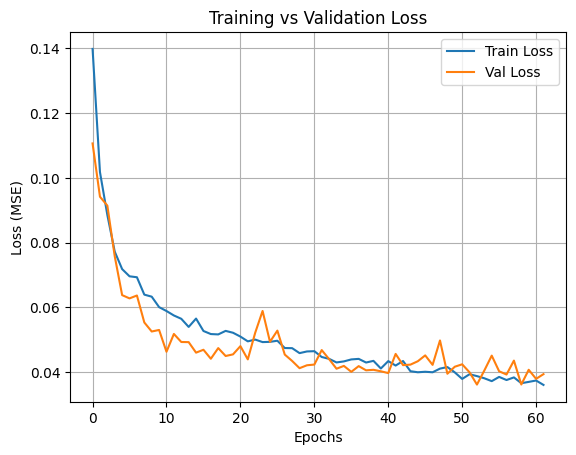

In [ ]:
plt.plot(history_rabi.history['loss'], label='Train Loss')
plt.plot(history_rabi.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

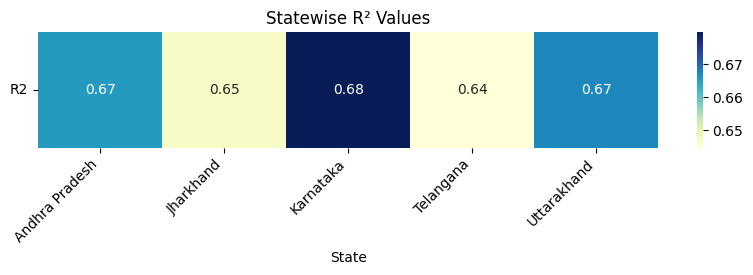

In [ ]:
plt.figure(figsize=(10, 1.5))
heatmap_data = final_results_df_rabi.set_index("State")[["R2"]].T
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title("Statewise R² Values")
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

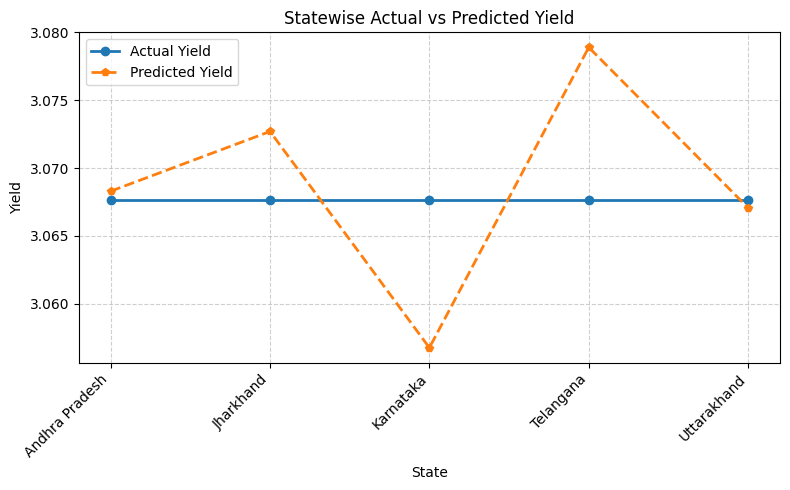

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(final_results_df_rabi['State'], final_results_df_rabi['Actual_Yield'], label='Actual Yield', marker='o', linewidth=2)
plt.plot(final_results_df_rabi['State'], final_results_df_rabi['Predicted_Yield'], label='Predicted Yield', marker='p', linewidth=2, linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Yield')
plt.title('Statewise Actual vs Predicted Yield')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# WHEAT

In [ ]:
df_wheat=pd.read_csv('/content/drive/MyDrive/Agri Dataset ISI/merged_wheat_reservoir.csv')
df_wheat.head()

state_name crop_name  apy_item_interval_start  \
0  Andhra Pradesh     wheat                     2000   
1  Andhra Pradesh     wheat                     2000   
2  Andhra Pradesh     wheat                     2000   
3  Andhra Pradesh     wheat                     2000   
4  Andhra Pradesh     wheat                     2000   

  temperature_recorded_date  state_temperature_max_val  \
0                2000-01-01                      30.38   
1                2000-01-02                      30.04   
2                2000-01-03                      29.92   
3                2000-01-04                      29.98   
4                2000-01-05                      29.77   

   state_temperature_min_val  state_rainfall_val    yield         FRL  \
0                      14.47                 0.0  0.57038  152.296667   
1                      13.96                 0.0  0.57038  152.296667   
2                      12.98                 0.0  0.57038  152.296667   
3                      12.23                 0.0  0.57038  152.296667   
4                      13.24                 0.0  0.57038  152.296667   

   Live Cap FRL   Level  Current Live Storage  
0      2.838333  266.30                 6.390  
1      2.838333  266.18                 6.330  
2      2.838333  266.09                 6.286  
3      2.838333  266.03                 6.257  
4      2.838333  265.97                 6.228

In [ ]:
df_wheat['state_name'].unique()

array(['Andhra Pradesh', 'Chhattisgarh', 'Gujarat', 'Jharkhand',
       'Karnataka', 'Madhya Pradesh', 'Maharashtra', 'Odisha',
       'Rajasthan', 'Tamil Nadu', 'Telangana', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [ ]:
df_wheat.isnull().sum()

state_name                     0
crop_name                      0
apy_item_interval_start        0
temperature_recorded_date      0
state_temperature_max_val      0
state_temperature_min_val      0
state_rainfall_val             0
yield                          0
FRL                            0
Live Cap FRL                   0
Level                        367
Current Live Storage         364
dtype: int64

In [ ]:
df_wheat.dropna(inplace=True)

In [ ]:
df_wheat.isnull().sum()

state_name                   0
crop_name                    0
apy_item_interval_start      0
temperature_recorded_date    0
state_temperature_max_val    0
state_temperature_min_val    0
state_rainfall_val           0
yield                        0
FRL                          0
Live Cap FRL                 0
Level                        0
Current Live Storage         0
dtype: int64

<Axes: >

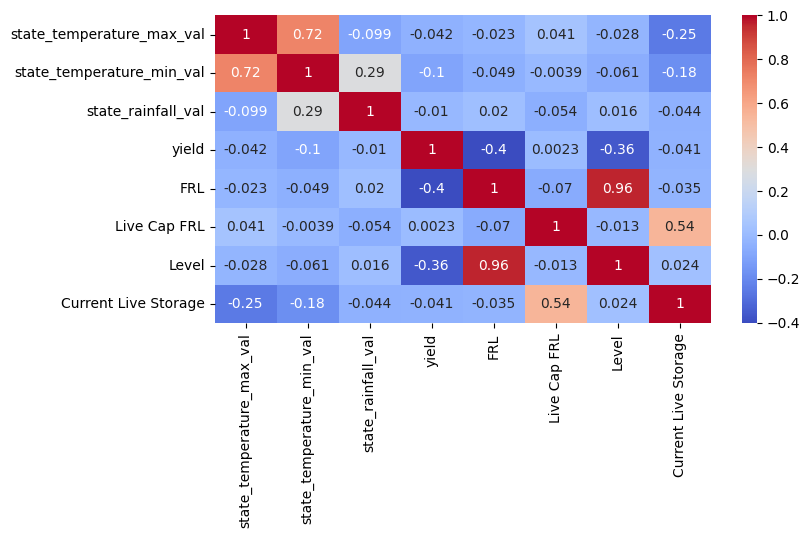

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df_wheat[num_cols].corr(), annot=True, cmap='coolwarm')

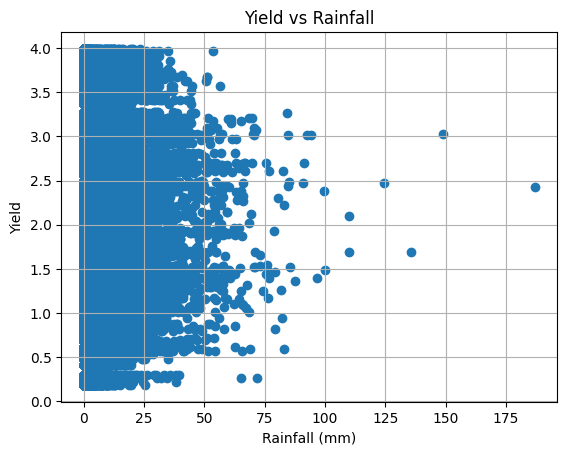

In [ ]:
plt.scatter(df_wheat['state_rainfall_val'],df_wheat['yield'])
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield')
plt.title('Yield vs Rainfall')
plt.grid(True)
plt.show()

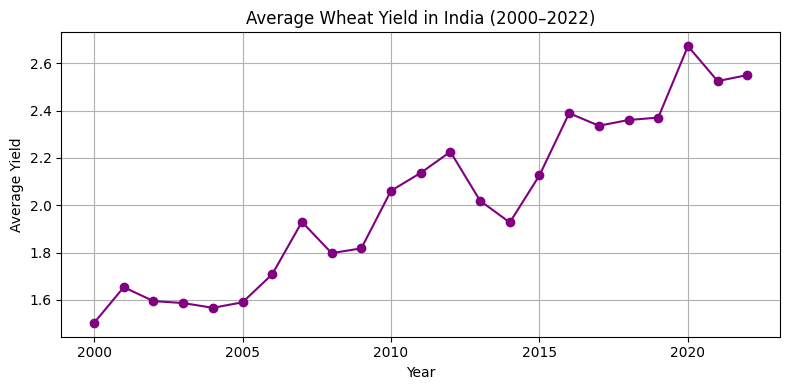

In [ ]:
# Filter data for years 2000 to 2022
df_filtered_wheat = df_wheat[(df_wheat['apy_item_interval_start'] >= 2000) & (df_wheat['apy_item_interval_start'] <= 2022)]

# Group by year and get average yield
df_yearly_wheat_yield = df_filtered_wheat.groupby('apy_item_interval_start', as_index=False)['yield'].mean()

plt.figure(figsize=(8, 4))
plt.plot(df_yearly_wheat_yield['apy_item_interval_start'], df_yearly_wheat_yield['yield'], color='purple', marker='o', linestyle='-')
plt.title('Average Wheat Yield in India (2000–2022)')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

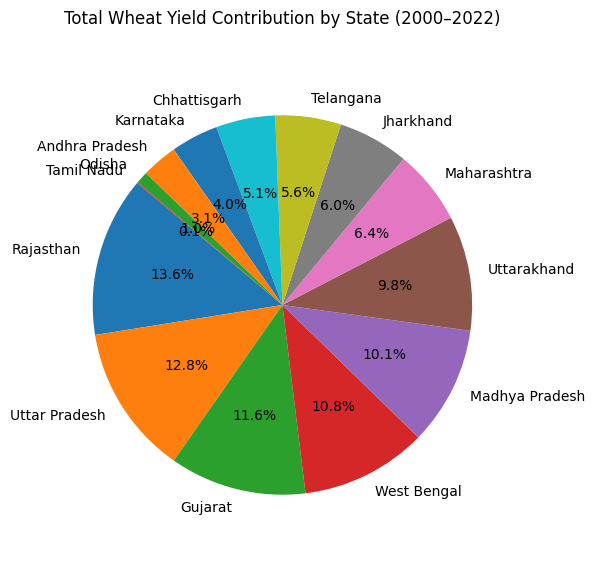

In [ ]:
state_yield_sum_wheat = df_filtered_wheat.groupby('state_name')['yield'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(state_yield_sum_wheat, labels=state_yield_sum_wheat.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Wheat Yield Contribution by State (2000–2022)')
plt.axis('equal')
plt.tight_layout()
plt.show()

Rajasthan (13.6%) – Highest contributor
\
Uttar Pradesh (12.8%) – Traditionally the largest wheat-producing state
\
Gujarat (11.6%)
\
West Bengal (10.8%)
\
Madhya Pradesh (10.1%)
\
Uttarakhand (9.8%)
\
Together, these 6 states contribute around 69% of total wheat yield.

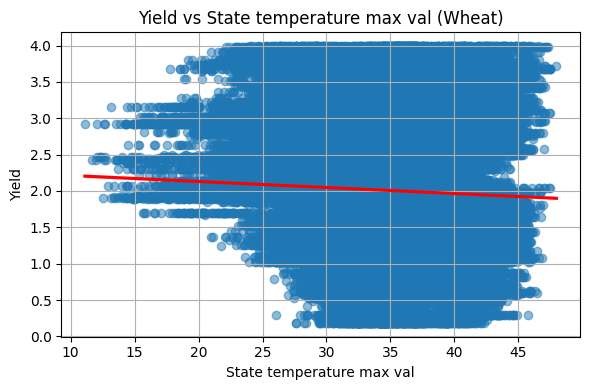

Correlation between state_temperature_max_val and yield: -0.042


In [ ]:
wheat_feature_col = 'state_temperature_max_val'
wheat_target_col = 'yield'

# Drop missing values
df_wheat_temp_yield = df_wheat[[wheat_feature_col, wheat_target_col]].dropna()

# Scatter + Regression Line
plt.figure(figsize=(6, 4))
sns.regplot(x=wheat_feature_col, y=wheat_target_col, data=df_wheat_temp_yield,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'{wheat_target_col.capitalize()} vs {wheat_feature_col.replace("_", " ").capitalize()} (Wheat)')
plt.xlabel(wheat_feature_col.replace('_', ' ').capitalize())
plt.ylabel(wheat_target_col.capitalize())
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = df_wheat_temp_yield[wheat_feature_col].corr(df_wheat_temp_yield[wheat_target_col])
print(f"Correlation between {wheat_feature_col} and {wheat_target_col}: {correlation:.3f}")

Despite the large volume of data points, the regression line is slightly sloping downwards, suggesting a minor negative relationship.\
Slight downward slope and weak negative correlation suggest that higher maximum temperatures may slightly reduce wheat yield, but the relationship is weak.

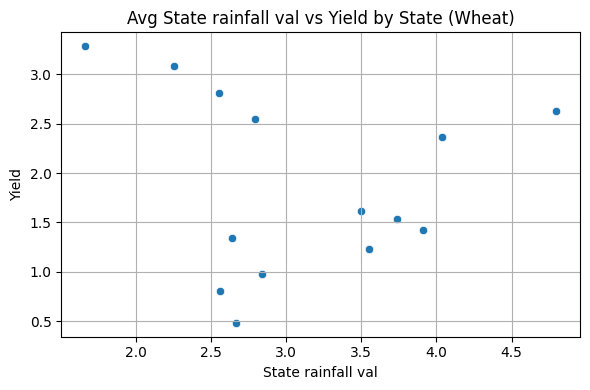

Correlation between state rainfall val and yield: -0.139


In [ ]:
# Define feature and target
wheat_feature_col2 = 'state_rainfall_val'
wheat_target_col = 'yield'

# Group by state and get averages
# Assuming df_wheat is your DataFrame for wheat data
state_avg_wheat = df_wheat.groupby('state_name')[[wheat_feature_col2, wheat_target_col]].mean().dropna()

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=wheat_feature_col2, y=wheat_target_col, data=state_avg_wheat)
plt.title(f'Avg {wheat_feature_col2.replace("_", " ").capitalize()} vs {wheat_target_col.capitalize()} by State (Wheat)')
plt.xlabel(wheat_feature_col2.replace('_', ' ').capitalize())
plt.ylabel(wheat_target_col.capitalize())
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = state_avg_wheat[wheat_feature_col2].corr(state_avg_wheat[wheat_target_col])
print(f"Correlation between {wheat_feature_col2.replace('_', ' ')} and {wheat_target_col}: {correlation:.3f}")

Negative value: As rainfall increases, wheat yield tends to decrease slightly.
\
Magnitude is low (close to 0): The relationship is weak.
\
It suggests rainfall alone doesn't strongly influence wheat yield.

In [ ]:
states_wheat = df_wheat['state_name'].unique()
state_scores_wheat = []
for state in states_wheat:
    state_df_wheat = df_wheat[df_wheat['state_name'] == state].dropna()

    # Define features and target
    X_wheat = state_df_wheat[['state_temperature_max_val','state_temperature_min_val','state_rainfall_val','FRL','Live Cap FRL','Current Live Storage','Level']]
    y_wheat = state_df_wheat['yield']

    # Split and scale
    X_train_wheat, X_test_wheat, y_train_wheat, y_test_wheat = train_test_split(X_wheat, y_wheat, test_size=0.2, random_state=42)
    scaler_wheat = StandardScaler()
    scaler_y_wheat=MinMaxScaler()

    X_train_scaled_wheat = scaler_wheat.fit_transform(X_train_wheat)
    X_test_scaled_wheat = scaler_wheat.transform(X_test_wheat)
    y_train_scaled_wheat = scaler_y_wheat.fit_transform(y_train_wheat.values.reshape(-1, 1))


In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.2 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(hp):
    model_wheat = Sequential()

    # Number of hidden layers (1 to 3)
    for i in range(hp.Int('num_layers', 1, 3)):
        units_wheat = hp.Int(f'units_{i}', min_value=32, max_value=512, step=64)
        activation_wheat = hp.Choice(f'act_{i}', ['relu', 'tanh', 'selu','leaky_relu'])

        model_wheat.add(Dense(units=units_wheat, activation=activation_wheat))

        if hp.Boolean(f'dropout_{i}'):
            model_wheat.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', 0.1, 0.5, step=0.1)))

    # Output layer
    model_wheat.add(Dense(1))

    # Choose optimizer and learning rate
    optimizer_choice_wheat = hp.Choice('optimizer', ['adam', 'rmsprop'])
    lr_wheat = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice_wheat == 'adam':
        optimizer_wheat = Adam(learning_rate=lr_wheat)
    else:
        optimizer_wheat = RMSprop(learning_rate=lr_wheat)

    model_wheat.compile(optimizer=optimizer_wheat, loss='mse', metrics=['mae'])
    return model_wheat


In [ ]:
tuner_wheat = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='ann_tuning_wheat',
    project_name='yield_model_wheat',
    overwrite=True
)

In [ ]:
tuner_wheat.search(X_train_scaled_wheat, y_train_scaled_wheat,
             epochs=50,
             validation_split=0.2,
             batch_size=64,
             verbose=1)


Trial 10 Complete [00h 00m 46s]
val_loss: 0.08440012484788895

Best val_loss So Far: 0.051350312307477
Total elapsed time: 00h 09m 42s


In [ ]:
best_hp_wheat = tuner_wheat.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
for key in best_hp_wheat.values.keys():
    print(f"{key}: {best_hp_wheat.get(key)}")

Best hyperparameters:
num_layers: 3
units_0: 352
act_0: leaky_relu
dropout_0: True
optimizer: rmsprop
learning_rate: 0.0012918827423762096
dropout_rate_0: 0.1
units_1: 32
act_1: relu
dropout_1: False
units_2: 32
act_2: relu
dropout_2: False


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
state_scores_wheat = []
for state in states_wheat:
    # Define the model
    model_wheat = Sequential()

# Layer 0
    model_wheat.add(Dense(352, input_shape=(X_train_scaled_wheat.shape[1],)))
    model_wheat.add(LeakyReLU(alpha=0.1))  # act_0: leaky_relu
    model_wheat.add(Dropout(0.1))          # dropout_0: True

# Layer 1
    model_wheat.add(Dense(128, activation='relu'))  # act_1: relu

# Layer 2
    model_wheat.add(Dense(64, activation='relu'))  # act_2: relu

# Output layer
    model_wheat.add(Dense(1, activation='linear'))

# Optimizer
    optimizer = RMSprop(learning_rate=0.0012918827423762096)
    model_wheat.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
    history_wheat = model_wheat.fit(
      X_train_scaled_wheat, y_train_scaled_wheat,
      epochs=150,
      batch_size=32,
      validation_split=0.2,
      callbacks=[early_stop, reduce_lr],
      verbose=1
)

    y_pred_scaled_wheat = model_wheat.predict(X_test_scaled_wheat)
    y_pred_wheat = scaler_y_wheat.inverse_transform(y_pred_scaled_wheat)
    rmse_wheat = np.sqrt(mean_squared_error(y_test_wheat, y_pred_wheat))
    r2_wheat = r2_score(y_test_wheat, y_pred_wheat)
    actual_mean_wheat = y_test_wheat .mean()
    predicted_mean_wheat = np.mean(y_pred_wheat)

    print(f"State: {state} | RMSE: {rmse_wheat:.2f} | R²: {r2_wheat:.3f}")
    state_scores_wheat.append({
        'State': state,
        'RMSE': rmse_wheat,
        'R2': r2_wheat,
        'Actual_Yield': actual_mean_wheat,
        'Predicted_Yield': predicted_mean_wheat,
    })

Epoch 1/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1148 - mae: 0.2830 - val_loss: 0.0868 - val_mae: 0.2484 - learning_rate: 0.0013
Epoch 2/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0882 - mae: 0.2552 - val_loss: 0.0781 - val_mae: 0.2423 - learning_rate: 0.0013
Epoch 3/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0795 - mae: 0.2399 - val_loss: 0.0779 - val_mae: 0.2343 - learning_rate: 0.0013
Epoch 4/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0733 - mae: 0.2278 - val_loss: 0.0747 - val_mae: 0.2274 - learning_rate: 0.0013
Epoch 5/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0708 - mae: 0.2229 - val_loss: 0.0730 - val_mae: 0.2204 - learning_rate: 0.0013
Epoch 6/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0680 - mae: 0.2166 - val_loss: 0.0778 - val_mae: 0.2261 - learning_rate: 0.0013
Epoch 7/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0657 - mae: 0.2118 - val_loss: 0.0701 - val_mae: 0.2151 - learning_rate: 0.001

In [ ]:
final_results_df_wheat = pd.DataFrame(state_scores_wheat)
print(final_results_df_wheat)

             State      RMSE        R2  Actual_Yield  Predicted_Yield
0   Andhra Pradesh  0.198336  0.595137      2.621672         2.629573
1     Chhattisgarh  0.195516  0.606569      2.621672         2.619826
2          Gujarat  0.195093  0.608271      2.621672         2.632041
3        Jharkhand  0.201025  0.584083      2.621672         2.627295
4        Karnataka  0.195908  0.604991      2.621672         2.632960
5   Madhya Pradesh  0.198310  0.595245      2.621672         2.626347
6      Maharashtra  0.200600  0.585843      2.621672         2.625438
7           Odisha  0.199204  0.591586      2.621672         2.622365
8        Rajasthan  0.198382  0.594952      2.621672         2.626641
9       Tamil Nadu  0.198091  0.596137      2.621672         2.628753
10       Telangana  0.196264  0.603551      2.621672         2.629448
11     Uttarakhand  0.197418  0.598877      2.621672         2.623474
12   Uttar Pradesh  0.197239  0.599605      2.621672         2.624480
13     West Bengal  

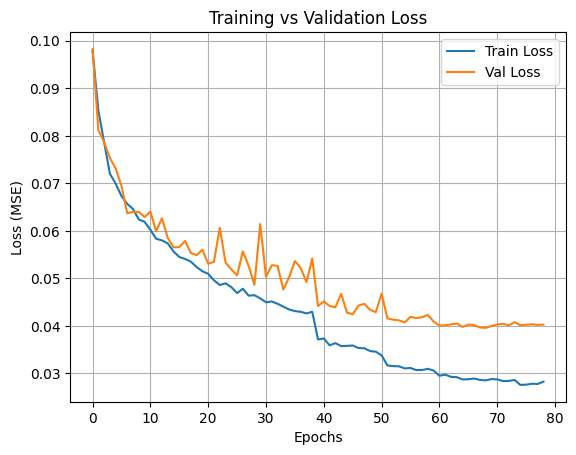

In [ ]:
plt.plot(history_wheat.history['loss'], label='Train Loss')
plt.plot(history_wheat.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

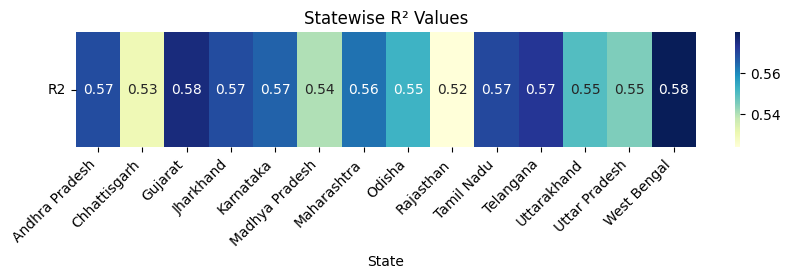

In [ ]:
plt.figure(figsize=(10, 1.5))
heatmap_data = final_results_df_wheat.set_index("State")[["R2"]].T
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", cbar=True)
plt.title("Statewise R² Values")
plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

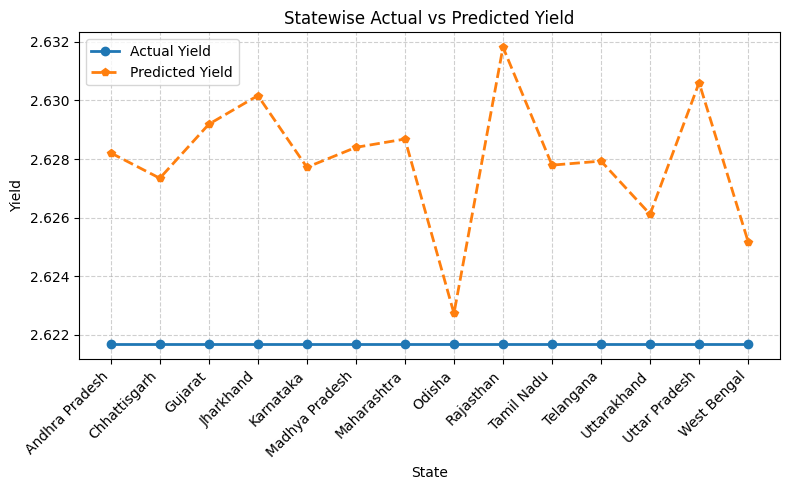

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(final_results_df_wheat['State'], final_results_df_wheat['Actual_Yield'], label='Actual Yield', marker='o', linewidth=2)
plt.plot(final_results_df_wheat['State'], final_results_df_wheat['Predicted_Yield'], label='Predicted Yield', marker='p', linewidth=2, linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.xlabel('State')
plt.ylabel('Yield')
plt.title('Statewise Actual vs Predicted Yield')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# POTATO

In [ ]:
df_potato=pd.read_csv('/content/drive/MyDrive/Agri Dataset ISI/merged_potato_reservoir.csv')
df_potato.head()

state_name crop_name  apy_item_interval_start  \
0  Andhra Pradesh    potato                     2012   
1  Andhra Pradesh    potato                     2012   
2  Andhra Pradesh    potato                     2012   
3  Andhra Pradesh    potato                     2012   
4  Andhra Pradesh    potato                     2012   

  temperature_recorded_date  state_temperature_max_val  \
0                2012-01-01                      31.05   
1                2012-01-02                      32.33   
2                2012-01-03                      33.15   
3                2012-01-04                      33.95   
4                2012-01-05                      33.79   

   state_temperature_min_val  state_rainfall_val     yield         FRL  \
0                      17.86               10.92  15.31692  337.152584   
1                      17.19                2.29  15.31692  337.152584   
2                      16.89                0.71  15.31692  337.152584   
3                      17.70                0.00  15.31692  337.152584   
4                      17.61                0.00  15.31692  337.152584   

   Live Cap FRL       Level  Current Live Storage  
0      0.198465  174.568780              0.782629  
1      0.198465  174.565447              0.781853  
2      0.198465  174.563225              0.781850  
3      0.198465  174.557669              0.780744  
4      0.198465  174.548780              0.780603

In [ ]:
df_potato['state_name'].unique()

array(['Andhra Pradesh', 'Chhattisgarh', 'Jharkhand', 'Karnataka',
       'Tamil Nadu', 'Telangana', 'Uttarakhand', 'Uttar Pradesh',
       'West Bengal'], dtype=object)

In [ ]:
df_potato.isnull().sum()

state_name                     0
crop_name                      0
apy_item_interval_start        0
temperature_recorded_date      0
state_temperature_max_val      0
state_temperature_min_val      0
state_rainfall_val             0
yield                          0
FRL                            0
Live Cap FRL                   0
Level                        382
Current Live Storage         382
dtype: int64

In [ ]:
df_potato.dropna(inplace=True)

In [ ]:
df_potato.isnull().sum()

state_name                   0
crop_name                    0
apy_item_interval_start      0
temperature_recorded_date    0
state_temperature_max_val    0
state_temperature_min_val    0
state_rainfall_val           0
yield                        0
FRL                          0
Live Cap FRL                 0
Level                        0
Current Live Storage         0
dtype: int64

<Axes: >

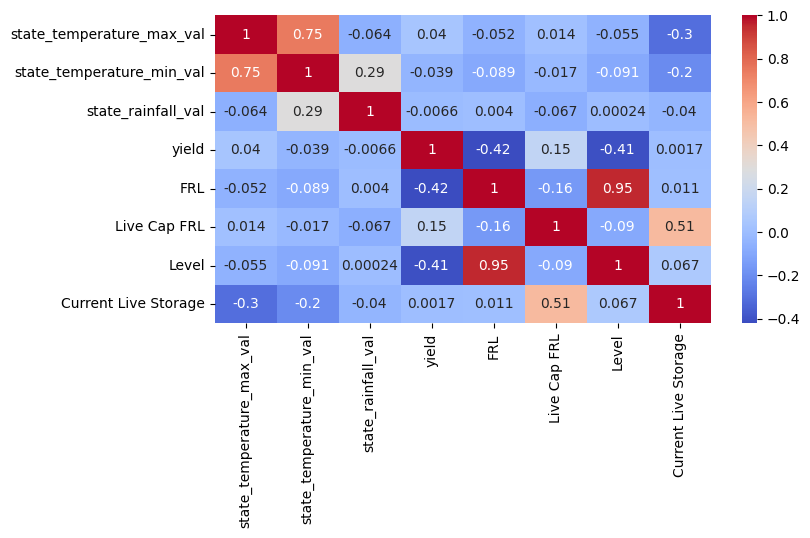

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df_potato[num_cols].corr(), annot=True, cmap='coolwarm')

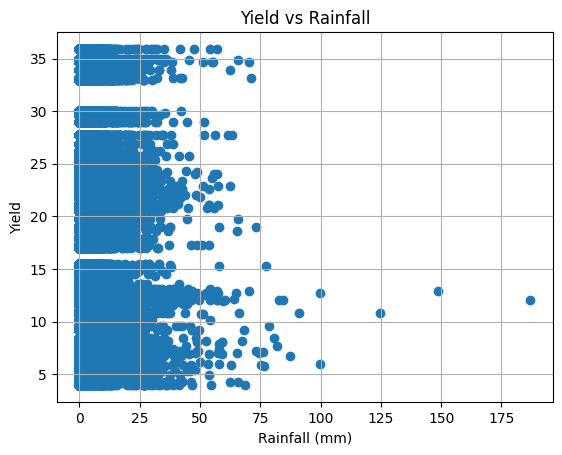

In [ ]:
plt.scatter(df_potato['state_rainfall_val'],df_potato['yield'])
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield')
plt.title('Yield vs Rainfall')
plt.grid(True)
plt.show()

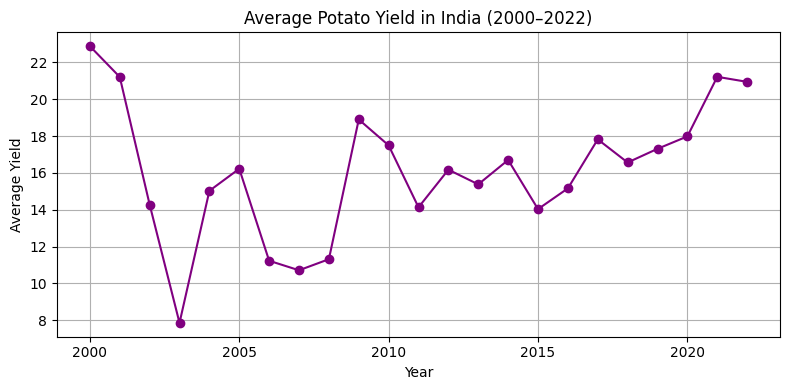

In [ ]:
# Filter data for years 2000 to 2022
df_filtered_potato = df_potato[(df_potato['apy_item_interval_start'] >= 2000) & (df_potato['apy_item_interval_start'] <= 2022)]

# Group by year and get average yield
df_yearly_potato_yield = df_filtered_potato.groupby('apy_item_interval_start', as_index=False)['yield'].mean()

plt.figure(figsize=(8, 4))
plt.plot(df_yearly_potato_yield['apy_item_interval_start'], df_yearly_potato_yield['yield'], color='purple', marker='o', linestyle='-')
plt.title('Average Potato Yield in India (2000–2022)')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

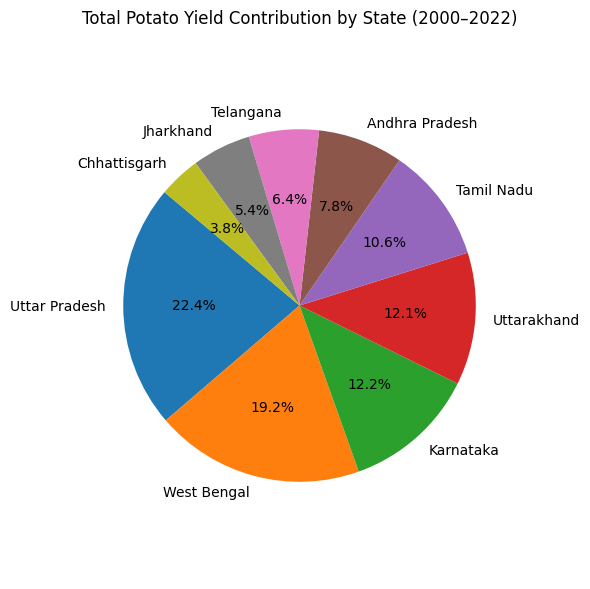

In [ ]:
state_yield_sum_potato = df_filtered_potato.groupby('state_name')['yield'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(state_yield_sum_potato, labels=state_yield_sum_potato.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Potato Yield Contribution by State (2000–2022)')
plt.axis('equal')
plt.tight_layout()
plt.show()

Uttar Pradesh	22.4%
West Bengal	19.2%
Karnataka	12.2%
Uttarakhand	12.1%
The top 3 states (UP, WB, Karnataka) contribute over 53% of the national yield.

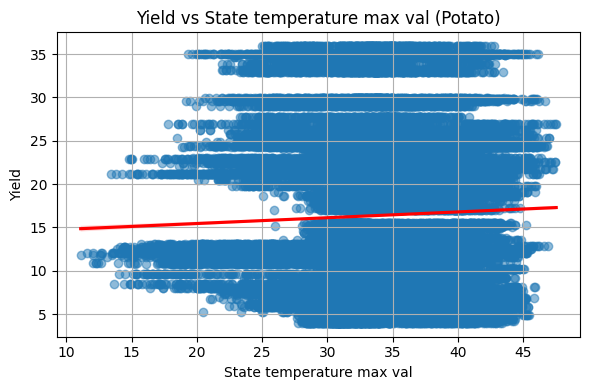

Correlation between state_temperature_max_val and yield: 0.040


In [ ]:
potato_feature_col = 'state_temperature_max_val'
potato_target_col = 'yield'

# Drop missing values
df_potato_temp_yield = df_potato[[potato_feature_col, potato_target_col]].dropna()

# Scatter + Regression Line
plt.figure(figsize=(6, 4))
sns.regplot(x=potato_feature_col, y=potato_target_col, data=df_potato_temp_yield,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'{potato_target_col.capitalize()} vs {potato_feature_col.replace("_", " ").capitalize()} (Potato)')
plt.xlabel(potato_feature_col.replace('_', ' ').capitalize())
plt.ylabel(potato_target_col.capitalize())
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = df_potato_temp_yield[potato_feature_col].corr(df_potato_temp_yield[potato_target_col])
print(f"Correlation between {potato_feature_col} and {potato_target_col}: {correlation:.3f}")

As maximum temperature increases, potato yield also slightly increases on average.
\
This suggests:
Potato can tolerate or even benefit from moderate warmth.
Higher max temperatures don’t strongly harm the crop — and may even help in drying and maturation stages

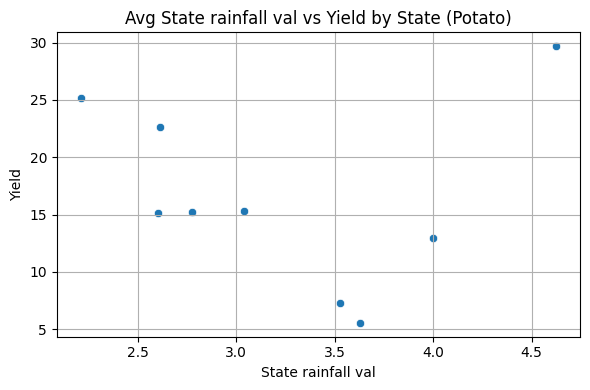

Correlation between state rainfall val and yield: -0.049


In [ ]:
# Define feature and target
potato_feature_col2 = 'state_rainfall_val'
potato_target_col = 'yield'

# Group by state and get averages
# Assuming df_potato is your DataFrame for potato data
state_avg_potato = df_potato.groupby('state_name')[[potato_feature_col2, potato_target_col]].mean().dropna()

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=potato_feature_col2, y=potato_target_col, data=state_avg_potato)
plt.title(f'Avg {potato_feature_col2.replace("_", " ").capitalize()} vs {potato_target_col.capitalize()} by State (Potato)')
plt.xlabel(potato_feature_col2.replace('_', ' ').capitalize())
plt.ylabel(potato_target_col.capitalize())
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = state_avg_potato[potato_feature_col2].corr(state_avg_potato[potato_target_col])
print(f"Correlation between {potato_feature_col2.replace('_', ' ')} and {potato_target_col}: {correlation:.3f}")

Correlation of -0.049 ≈ almost no relationship.

Slight downward tilt suggests a tiny trend where:

As rainfall increases, yield may slightly decrease, but it's statistically negligible.

In [ ]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
states_potato = df_potato['state_name'].unique()
state_scores_potato = []
for state in states_potato:
    state_df_potato = df_potato[df_potato['state_name'] == state].dropna()

    # Define features and target
    X_potato = state_df_potato[['state_temperature_max_val','state_temperature_min_val','state_rainfall_val','FRL','Live Cap FRL','Current Live Storage','Level']]
    y_potato = state_df_potato['yield']

    # Split and scale
    X_train_potato, X_test_potato, y_train_potato, y_test_potato = train_test_split(X_potato, y_potato, test_size=0.2, random_state=42)
    scaler_potato = StandardScaler()
    scaler_y_potato=StandardScaler()

    X_train_scaled_potato = scaler_potato.fit_transform(X_train_potato)
    X_test_scaled_potato = scaler_potato.transform(X_test_potato)
    y_train_scaled_potato = scaler_y_potato.fit_transform(y_train_potato.values.reshape(-1, 1))
    y_test_scaled_potato = scaler_y_potato.transform(y_test_potato.values.reshape(-1, 1))

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(hp):
    model_potato = Sequential()

    # Number of hidden layers (1 to 3)
    for i in range(hp.Int('num_layers', 1, 4)):
        units_potato = hp.Int(f'units_{i}', min_value=32, max_value=512, step=64)
        activation_potato = hp.Choice(f'act_{i}', ['relu', 'tanh','leaky_relu'])

        model_potato.add(Dense(units=units_potato, activation=activation_potato))

        if hp.Boolean(f'dropout_{i}'):
            model_potato.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', 0.1, 0.5, step=0.1)))

    # Output layer
    model_potato.add(Dense(1))

    # Choose optimizer and learning rate
    optimizer_choice_potato = hp.Choice('optimizer', ['adam', 'rmsprop'])
    lr_potato = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice_potato == 'adam':
        optimizer_potato = Adam(learning_rate=lr_potato)
    else:
        optimizer_potato = RMSprop(learning_rate=lr_potato)

    model_potato.compile(optimizer=optimizer_potato, loss='mse', metrics=['mae'])
    return model_potato


In [ ]:
tuner_potato = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='ann_tuning_potato',
    project_name='yield_model_potato',
    overwrite=True
)

In [ ]:
tuner_potato.search(X_train_scaled_potato, y_train_scaled_potato,
             epochs=54,
             validation_split=0.2,
             batch_size=32,
             verbose=1)


Trial 10 Complete [00h 01m 06s]
val_loss: 0.6698587536811829

Best val_loss So Far: 0.5301139950752258
Total elapsed time: 00h 11m 54s


In [ ]:
best_hp_potato = tuner_potato.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
for key in best_hp_potato.values.keys():
    print(f"{key}: {best_hp_potato.get(key)}")

Best hyperparameters:
num_layers: 4
units_0: 480
act_0: relu
dropout_0: True
optimizer: adam
learning_rate: 0.0032994932070837374
dropout_rate_0: 0.2
units_1: 160
act_1: tanh
dropout_1: True
units_2: 288
act_2: tanh
dropout_2: False
dropout_rate_1: 0.4
units_3: 224
act_3: relu
dropout_3: False
dropout_rate_2: 0.2


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
state_scores_potato = []
for state in states_potato:
    # Define the model
    model_potato = Sequential()

# Layer 0
    model_potato.add(Dense(480, activation='relu', input_shape=(X_train_scaled_potato.shape[1],)))

    model_potato.add(BatchNormalization())
    model_potato.add(Dropout(0.2))
    model_potato.add(Dense(160, activation='tanh'))
    model_potato.add(BatchNormalization())
    model_potato.add(Dropout(0.4))
    model_potato.add(Dense(288,activation='tanh'))
    model_potato.add(BatchNormalization())
    model_potato.add(Dense(224,activation='relu'))
    model_potato.add(BatchNormalization())
    model_potato.add(Dropout(0.2))

# Output layer
    model_potato.add(Dense(1, activation='linear'))

# Optimizer
    optimizer_p = Adam(learning_rate=0.0032994932070837374)
    model_potato.compile(optimizer=optimizer_p, loss='mse', metrics=['mae'])

# Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=18, restore_best_weights=True)
    reduce_lr_pot = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
    history_potato = model_potato.fit(
      X_train_scaled_potato, y_train_scaled_potato,
      epochs=150,
      batch_size=64,
      validation_split=0.2,
      callbacks=[early_stop, reduce_lr_pot],
      verbose=1
)

    y_pred_scaled_potato = model_potato.predict(X_test_scaled_potato)
    y_pred_potato = scaler_y_potato.inverse_transform(y_pred_scaled_potato)
    rmse_potato = np.sqrt(mean_squared_error(y_test_scaled_potato, y_pred_scaled_potato))
    r2_potato = r2_score(y_test_scaled_potato, y_pred_scaled_potato)
    actual_mean_potato = y_test_potato .mean()
    predicted_mean_potato = np.mean(y_pred_potato)

    print(f"State: {state} | RMSE: {rmse_potato:.2f} | R²: {r2_potato:.3f}")
    state_scores_potato.append({
        'State': state,
        'RMSE': rmse_potato,
        'R2': r2_potato,
        'Actual_Yield': actual_mean_potato,
        'Predicted_Yield': predicted_mean_potato,
    })

Epoch 1/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 10s 67ms/step - loss: 2.7560 - mae: 1.2803 - val_loss: 1.0333 - val_mae: 0.8655 - learning_rate: 0.0033
Epoch 2/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.2050 - mae: 0.9039 - val_loss: 0.9667 - val_mae: 0.8458 - learning_rate: 0.0033
Epoch 3/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0035 - mae: 0.8144 - val_loss: 0.9915 - val_mae: 0.8421 - learning_rate: 0.0033
Epoch 4/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9991 - mae: 0.8239 - val_loss: 1.0016 - val_mae: 0.8414 - learning_rate: 0.0033
Epoch 5/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9191 - mae: 0.7898 - val_loss: 0.8505 - val_mae: 0.7658 - learning_rate: 0.0033
Epoch 6/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9225 - mae: 0.7826 - val_loss: 0.8189 - val_mae: 0.7694 - learning_rate: 0.0033
Epoch 7/150
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8538 - mae: 0.7624 - val_loss: 0.8242 - val_mae: 0.7542 - learning_rate: 0.0033
Epoch 8/150

In [ ]:
rmse_scaled = np.sqrt(mean_squared_error(
    scaler_y_potato.transform(y_test_potato.values.reshape(-1, 1)),
    y_pred_scaled_potato
))
print("RMSE (scaled space):", rmse_scaled)
print("Expected real RMSE:", rmse_scaled * np.std(y_train_potato))


RMSE (scaled space): 0.6667155323301854
Expected real RMSE: 3.156654775359326


In [ ]:
final_results_df_potato = pd.DataFrame(state_scores_potato)
print(final_results_df_potato)

            State      RMSE        R2  Actual_Yield  Predicted_Yield
0  Andhra Pradesh  0.693650  0.542268     29.593285        29.835829
1    Chhattisgarh  0.669063  0.574142     29.593285        29.836721
2       Jharkhand  0.674199  0.567579     29.593285        29.816730
3       Karnataka  0.680787  0.559087     29.593285        29.835361
4      Tamil Nadu  0.683481  0.555591     29.593285        29.792906
5       Telangana  0.662502  0.582454     29.593285        29.737795
6     Uttarakhand  0.664586  0.579822     29.593285        29.660210
7   Uttar Pradesh  0.678009  0.562678     29.593285        29.801168
8     West Bengal  0.666716  0.577126     29.593285        29.769056


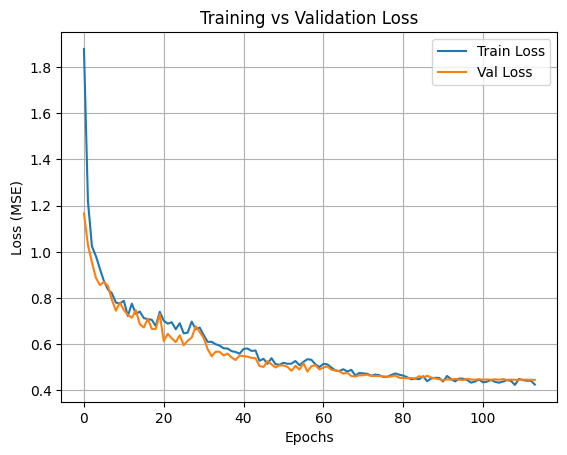

In [ ]:
plt.plot(history_potato.history['loss'], label='Train Loss')
plt.plot(history_potato.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# MASSOR

In [ ]:
df_massor=pd.read_csv('/content/drive/MyDrive/Agri Dataset ISI/merged_massor_reservoir.csv')
df_massor.head()

state_name crop_name  apy_item_interval_start temperature_recorded_date  \
0  Chhattisgarh    masoor                     2000                2000-01-01   
1  Chhattisgarh    masoor                     2000                2000-01-02   
2  Chhattisgarh    masoor                     2000                2000-01-03   
3  Chhattisgarh    masoor                     2000                2000-01-04   
4  Chhattisgarh    masoor                     2000                2000-01-05   

   state_temperature_max_val  state_temperature_min_val  state_rainfall_val  \
0                      28.95                       8.16                 0.0   
1                      28.95                       7.38                 0.0   
2                      28.15                       5.39                 0.0   
3                      28.13                       6.17                 0.0   
4                      28.02                       4.52                 0.0   

     yield     FRL  Live Cap FRL    Level  Current Live Storage  
0  0.27097  377.82      1.365667  349.965                1.2505  
1  0.27097  377.82      1.365667  349.920                1.2450  
2  0.27097  377.82      1.365667  349.885                1.2395  
3  0.27097  377.82      1.365667  349.840                1.2335  
4  0.27097  377.82      1.365667  349.800                1.2280

In [ ]:
df_massor['state_name'].unique()

array(['Chhattisgarh', 'Jharkhand', 'Madhya Pradesh', 'Odisha',
       'Rajasthan', 'Telangana', 'Uttarakhand', 'Uttar Pradesh',
       'West Bengal'], dtype=object)

In [ ]:
df_massor.isnull().sum()

state_name                     0
crop_name                      0
apy_item_interval_start        0
temperature_recorded_date      0
state_temperature_max_val      0
state_temperature_min_val      0
state_rainfall_val             0
yield                          0
FRL                            0
Live Cap FRL                   0
Level                        335
Current Live Storage         335
dtype: int64

In [ ]:
df_massor.dropna(inplace=True)

In [ ]:
df_massor.isnull().sum()

state_name                   0
crop_name                    0
apy_item_interval_start      0
temperature_recorded_date    0
state_temperature_max_val    0
state_temperature_min_val    0
state_rainfall_val           0
yield                        0
FRL                          0
Live Cap FRL                 0
Level                        0
Current Live Storage         0
dtype: int64

<Axes: >

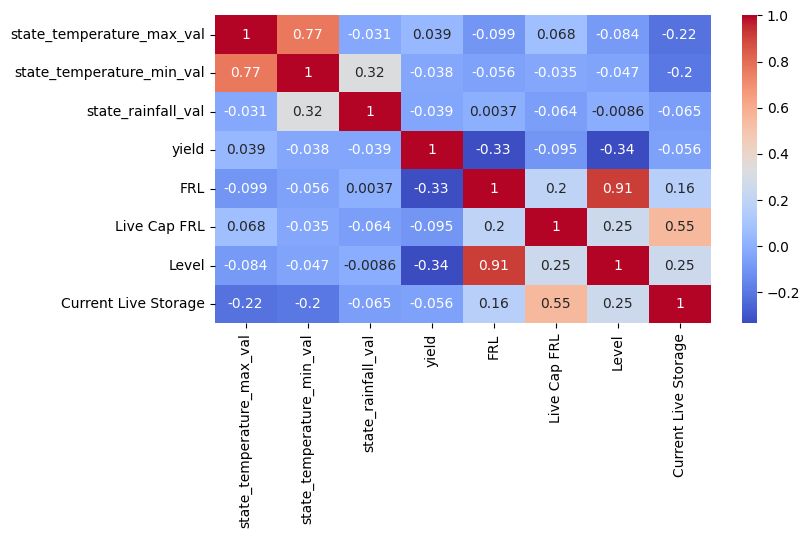

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df_massor[num_cols].corr(), annot=True, cmap='coolwarm')

No climate variable (temp/rain) is strongly correlated with yield.\
Surprisingly, reservoir variables like FRL and Level show moderate negative correlations — meaning:

As reservoir levels increase, yield tends to decrease slightly.\
This could imply over-irrigation, waterlogging, or misalignment in seasons.
Current Live Storage also has mild negative correlation with yield.

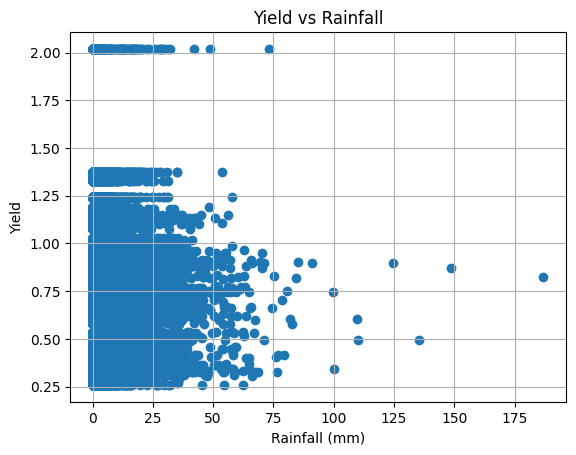

In [ ]:
plt.scatter(df_massor['state_rainfall_val'],df_massor['yield'])
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield')
plt.title('Yield vs Rainfall')
plt.grid(True)
plt.show()

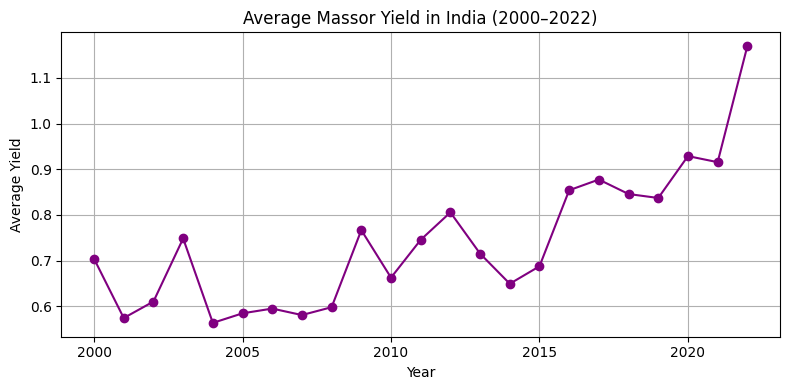

In [ ]:
# Filter data for years 2000 to 2022
df_filtered_massor = df_massor[(df_massor['apy_item_interval_start'] >= 2000) & (df_massor['apy_item_interval_start'] <= 2022)]

# Group by year and get average yield
df_yearly_massor_yield = df_filtered_massor.groupby('apy_item_interval_start', as_index=False)['yield'].mean()

plt.figure(figsize=(8, 4))
plt.plot(df_yearly_massor_yield['apy_item_interval_start'], df_yearly_massor_yield['yield'], color='purple', marker='o', linestyle='-')
plt.title('Average Massor Yield in India (2000–2022)')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

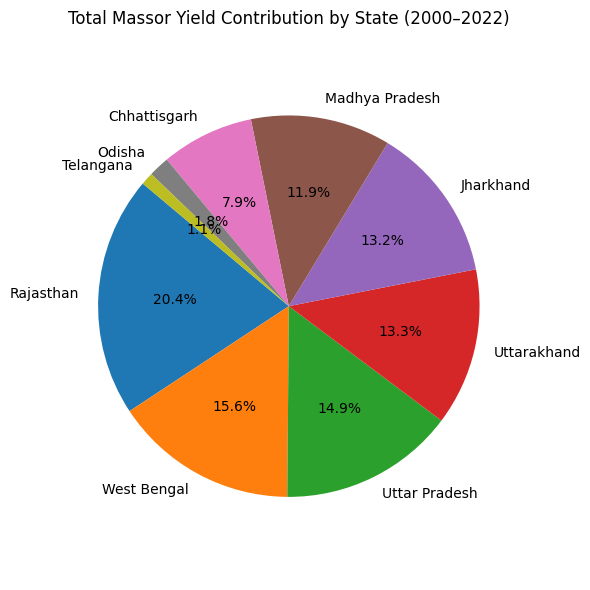

In [ ]:
state_yield_sum_massor = df_filtered_massor.groupby('state_name')['yield'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(state_yield_sum_massor, labels=state_yield_sum_massor.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Massor Yield Contribution by State (2000–2022)')
plt.axis('equal')
plt.tight_layout()
plt.show()

🥇 Rajasthan	20.4%
🥈 West Bengal	15.6%
🥉 Uttar Pradesh	14.9%
4️⃣ Uttarakhand	13.3%
5️⃣ Jharkhand	13.2%
6️⃣ Madhya Pradesh	11.9%

Together, these 6 states contribute ~89% of total yield — indicating massor is highly concentrated in a few regions.

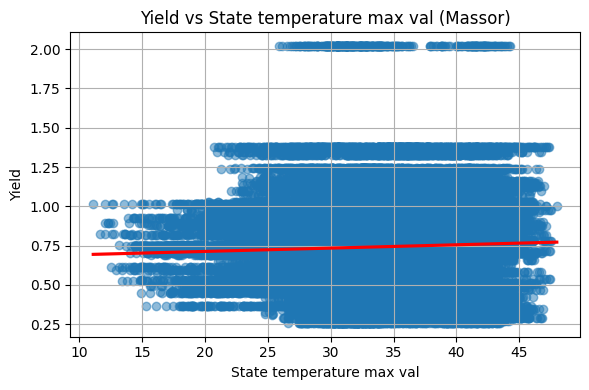

Correlation between state_temperature_max_val and yield: 0.039


In [ ]:
# Define feature and target
massor_feature_col = 'state_temperature_max_val'
massor_target_col = 'yield'

# Drop missing values
df_massor_temp_yield = df_massor[[massor_feature_col, massor_target_col]].dropna()

# Scatter + Regression Line
plt.figure(figsize=(6, 4))
sns.regplot(x=massor_feature_col, y=massor_target_col, data=df_massor_temp_yield,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'{massor_target_col.capitalize()} vs {massor_feature_col.replace("_", " ").capitalize()} (Massor)')
plt.xlabel(massor_feature_col.replace('_', ' ').capitalize())
plt.ylabel(massor_target_col.capitalize())
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = df_massor_temp_yield[massor_feature_col].corr(df_massor_temp_yield[massor_target_col])
print(f"Correlation between {massor_feature_col} and {massor_target_col}: {correlation:.3f}")


->A correlation of 0.039 is very close to zero, meaning:
There is no meaningful linear relationship between max temperature and massor crop yield.
The tiny positive value shows that as max temp increases, yield slightly increases, but this trend is extremely weak and likely coincidental.

->The scatter plot shows a dense horizontal spread of yield across a wide range of max temperatures (~10°C to 47°C).
The Lowess (red) line is nearly flat but slightly rising.

-> Yield is fairly stable across temperatures:
Massor yield does not drastically drop or rise with increasing max temperature.
There may be slight positive correlation, but it is very weak.

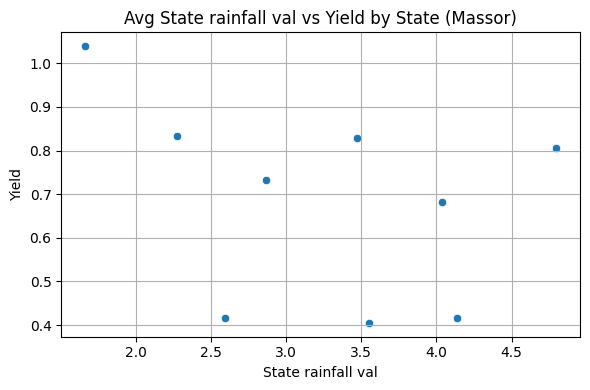

Correlation between state_rainfall_val and yield: -0.364


In [ ]:
# Define feature and target
massor_feature_col2= 'state_rainfall_val'
massor_target_col = 'yield'

# Group by state and get averages
state_avg_massor = df_massor.groupby('state_name')[[massor_feature_col2, massor_target_col]].mean().dropna()

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=massor_feature_col2, y=massor_target_col, data=state_avg_massor)
plt.title(f'Avg {massor_feature_col2.replace("_", " ").capitalize()} vs {massor_target_col.capitalize()} by State (Massor)')
plt.xlabel(massor_feature_col2.replace('_', ' ').capitalize())
plt.ylabel(massor_target_col.capitalize())
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = state_avg_massor[massor_feature_col2].corr(state_avg_massor[massor_target_col])
print(f"Correlation between {massor_feature_col2} and {massor_target_col}: {correlation:.3f}")

States with higher average rainfall tend to produce less massor yield, and
\
Low-rainfall states perform better for this crop.



In [ ]:
states_mas = df_massor['state_name'].unique()
state_scores_mas = []
for state in states_mas:
    state_df_mas = df_massor[df_massor['state_name'] == state].dropna()

    # Define features and target
    X_mas = state_df_mas[['state_temperature_max_val','state_temperature_min_val','state_rainfall_val','FRL','Live Cap FRL','Current Live Storage','Level']]
    y_mas = state_df_mas['yield']

    # Split and scale
    X_train_mas, X_test_mas, y_train_mas, y_test_mas = train_test_split(X_mas, y_mas, test_size=0.2, random_state=42)
    scaler_mas = StandardScaler()
    scaler_y_mas=StandardScaler()

    X_train_scaled_mas = scaler_mas.fit_transform(X_train_mas)
    X_test_scaled_mas = scaler_mas.transform(X_test_mas)
    y_train_scaled_mas = scaler_y_mas.fit_transform(y_train_mas.values.reshape(-1, 1))

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(hp):
    model_mas = Sequential()

    # Number of hidden layers (1 to 3)
    for i in range(hp.Int('num_layers', 1, 3)):
        units_mas = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
        activation_mas = hp.Choice(f'act_{i}', ['relu', 'tanh', 'selu'])

        model_mas.add(Dense(units=units_mas, activation=activation_mas))

        if hp.Boolean(f'dropout_{i}'):
            model_mas.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', 0.1, 0.5, step=0.1)))

    # Output layer
    model_mas.add(Dense(1))

    # Choose optimizer and learning rate
    optimizer_choice_mas = hp.Choice('optimizer', ['adam', 'rmsprop'])
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice_mas == 'adam':
        optimizer_mas = Adam(learning_rate=lr)
    else:
        optimizer_mas = RMSprop(learning_rate=lr)

    model_mas.compile(optimizer=optimizer_mas, loss='mse', metrics=['mae'])
    return model_mas

In [ ]:
tuner_mas = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='ann_tuning_mas',
    project_name='yield_model_mas',
    overwrite=True
)

In [ ]:
tuner_mas.search(X_train_scaled_mas, y_train_scaled_mas,
             epochs=50,
             validation_split=0.2,
             batch_size=32,
             verbose=1)



Trial 10 Complete [00h 01m 21s]
val_loss: 0.08371494337916374

Best val_loss So Far: 0.06398484483361244
Total elapsed time: 00h 14m 50s


In [ ]:
best_hp_mas = tuner_mas.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
for key in best_hp_mas.values.keys():
    print(f"{key}: {best_hp_mas.get(key)}")

Best hyperparameters:
num_layers: 3
units_0: 480
act_0: relu
dropout_0: False
optimizer: rmsprop
learning_rate: 0.00010934559084442661
dropout_rate_0: 0.2
units_1: 480
act_1: relu
dropout_1: False
units_2: 224
act_2: relu
dropout_2: True
dropout_rate_1: 0.5
dropout_rate_2: 0.1


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
state_scores_mas = []
for state in states_mas:
    # Define the model
    model_mas = Sequential()

# Layer 0
    model_mas.add(Dense(480, input_shape=(X_train_scaled_mas.shape[1],)))
    model_mas.add(BatchNormalization())
    model_mas.add(LeakyReLU(alpha=0.1))
    model_mas.add(Dropout(0.2))          # dropout_0: True

# Layer 1
    model_mas.add(Dense(480))
    model_mas.add(BatchNormalization())
    model_mas.add(LeakyReLU(alpha=0.1))
    #model_mas.add(Dropout(0.2))          # dropout_1: True
# Layer 2
    model_mas.add(Dense(224, activation='relu'))
    model_mas.add(BatchNormalization())
    model_mas.add(Dropout(0.1))

    model_mas.add(Dense(128))
    model_mas.add(BatchNormalization())
    model_mas.add(LeakyReLU(alpha=0.1))

# Output layer
    model_mas.add(Dense(1, activation='linear'))

# Optimizer
    optimizer = Adam(learning_rate=1e-4)
    model_mas.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=15, min_delta=1e-4, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
    history_mas = model_mas.fit(
      X_train_scaled_mas, y_train_scaled_mas,
      epochs=150,
      batch_size=32,
      validation_split=0.2,
      callbacks=[early_stop, reduce_lr],
      verbose=1
)

    y_pred_scaled_mas = model_mas.predict(X_test_scaled_mas)
    y_pred_mas = scaler_y_mas.inverse_transform(y_pred_scaled_mas)
    rmse_mas = np.sqrt(mean_squared_error(y_test_mas, y_pred_mas))
    r2_mas = r2_score(y_test_mas, y_pred_mas)
    actual_mean_mas = y_test_mas .mean()
    predicted_mean_mas = np.mean(y_pred_mas)

    print(f"State: {state} | RMSE: {rmse_mas:.2f} | R²: {r2_mas:.3f}")
    state_scores_mas.append({
        'State': state,
        'RMSE': rmse_mas,
        'R2': r2_mas,
        'Actual_Yield': actual_mean_mas,
        'Predicted_Yield': predicted_mean_mas,
    })

Epoch 1/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - loss: 1.3624 - mae: 0.9663 - val_loss: 0.9709 - val_mae: 0.8690 - learning_rate: 1.0000e-04
Epoch 2/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.0605 - mae: 0.8612 - val_loss: 0.9098 - val_mae: 0.8228 - learning_rate: 1.0000e-04
Epoch 3/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.9767 - mae: 0.8272 - val_loss: 0.8510 - val_mae: 0.7873 - learning_rate: 1.0000e-04
Epoch 4/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.9407 - mae: 0.8192 - val_loss: 0.8228 - val_mae: 0.7620 - learning_rate: 1.0000e-04
Epoch 5/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.9517 - mae: 0.8161 - val_loss: 0.8197 - val_mae: 0.7626 - learning_rate: 1.0000e-04
Epoch 6/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.9053 - mae: 0.7998 - val_loss: 0.8205 - val_mae: 0.7603 - learning_rate: 1.0000e-04
Epoch 7/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.8884 - mae: 0.7923 - val_loss: 0.8098 - val_mae:

In [ ]:
final_results_df_mas = pd.DataFrame(state_scores_mas)
print(final_results_df_mas)

            State      RMSE        R2  Actual_Yield  Predicted_Yield
0    Chhattisgarh  0.104995  0.383485      0.805541         0.805779
1       Jharkhand  0.107635  0.352091      0.805541         0.802902
2  Madhya Pradesh  0.107176  0.357604      0.805541         0.802804
3          Odisha  0.108404  0.342796      0.805541         0.802484
4       Rajasthan  0.105860  0.373279      0.805541         0.806166
5       Telangana  0.106178  0.369514      0.805541         0.807542
6     Uttarakhand  0.106670  0.363657      0.805541         0.804645
7   Uttar Pradesh  0.104352  0.391011      0.805541         0.807903
8     West Bengal  0.107457  0.354228      0.805541         0.802568


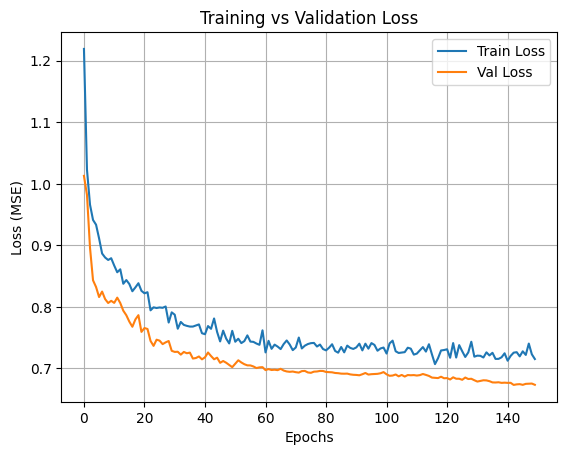

In [ ]:
plt.plot(history_mas.history['loss'], label='Train Loss')
plt.plot(history_mas.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

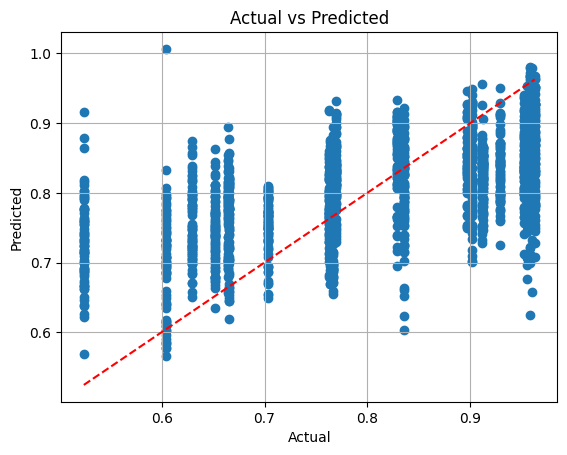

In [ ]:
plt.scatter(y_test_mas, y_pred_mas)
plt.plot([min(y_test_mas), max(y_test_mas)], [min(y_test_mas), max(y_test_mas)], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


In [ ]:
print("Variance of Actual Yields:", np.var(y_test_mas))


Variance of Actual Yields: 0.017881044945266295


# MUSTARD

In [ ]:
df_mustard=pd.read_csv('/content/drive/MyDrive/Agri Dataset ISI/merged_mustard_reservoir.csv')
df_mustard.head()

state_name          crop_name  apy_item_interval_start  \
0  Andhra Pradesh  rapeseed &mustard                     2000   
1  Andhra Pradesh  rapeseed &mustard                     2000   
2  Andhra Pradesh  rapeseed &mustard                     2000   
3  Andhra Pradesh  rapeseed &mustard                     2000   
4  Andhra Pradesh  rapeseed &mustard                     2000   

  temperature_recorded_date  state_temperature_max_val  \
0                2000-01-01                      30.38   
1                2000-01-02                      30.04   
2                2000-01-03                      29.92   
3                2000-01-04                      29.98   
4                2000-01-05                      29.77   

   state_temperature_min_val  state_rainfall_val    yield         FRL  \
0                      14.47                 0.0  0.23394  152.296667   
1                      13.96                 0.0  0.23394  152.296667   
2                      12.98                 0.0  0.23394  152.296667   
3                      12.23                 0.0  0.23394  152.296667   
4                      13.24                 0.0  0.23394  152.296667   

   Live Cap FRL   Level  Current Live Storage  
0      2.838333  266.30                 6.390  
1      2.838333  266.18                 6.330  
2      2.838333  266.09                 6.286  
3      2.838333  266.03                 6.257  
4      2.838333  265.97                 6.228

In [ ]:
df_mustard['state_name'].unique()

array(['Andhra Pradesh', 'Chhattisgarh', 'Gujarat', 'Jharkhand',
       'Karnataka', 'Madhya Pradesh', 'Maharashtra', 'Odisha',
       'Rajasthan', 'Tamil Nadu', 'Telangana', 'Uttarakhand',
       'Uttar Pradesh', 'West Bengal'], dtype=object)

In [ ]:
df_mustard.isnull().sum()

state_name                     0
crop_name                      0
apy_item_interval_start        0
temperature_recorded_date      0
state_temperature_max_val      0
state_temperature_min_val      0
state_rainfall_val             0
yield                          0
FRL                            0
Live Cap FRL                   0
Level                        400
Current Live Storage         397
dtype: int64

In [ ]:
df_mustard.dropna(inplace=True)

In [ ]:
df_mustard.isnull().sum()

state_name                   0
crop_name                    0
apy_item_interval_start      0
temperature_recorded_date    0
state_temperature_max_val    0
state_temperature_min_val    0
state_rainfall_val           0
yield                        0
FRL                          0
Live Cap FRL                 0
Level                        0
Current Live Storage         0
dtype: int64

<Axes: >

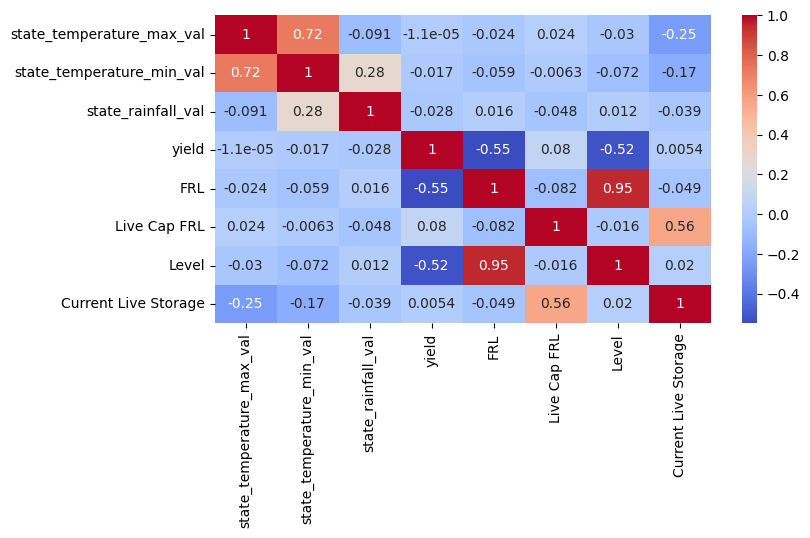

In [ ]:
plt.figure(figsize=(8,4))
sns.heatmap(df_mustard[num_cols].corr(), annot=True, cmap='coolwarm')

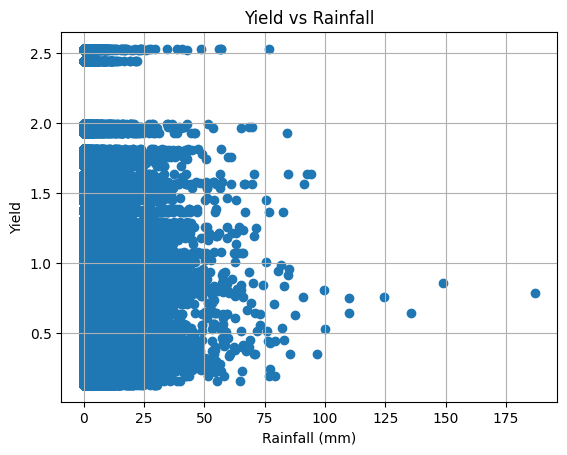

In [ ]:
plt.scatter(df_mustard['state_rainfall_val'],df_mustard['yield'])
plt.xlabel('Rainfall (mm)')
plt.ylabel('Yield')
plt.title('Yield vs Rainfall')
plt.grid(True)
plt.show()

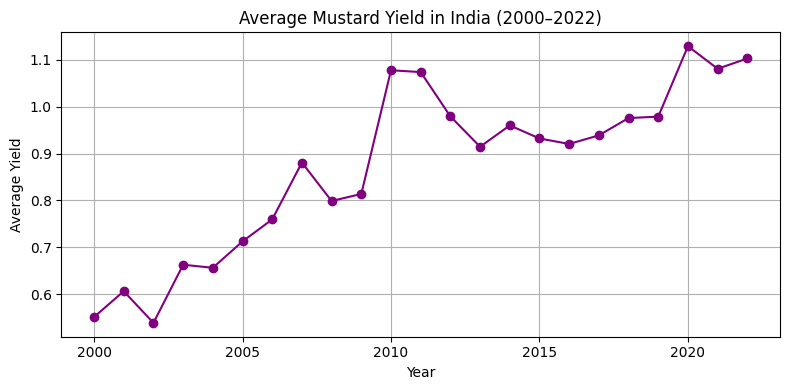

In [ ]:
# Filter data for years 2000 to 2022
df_filtered_mustard = df_mustard[(df_mustard['apy_item_interval_start'] >= 2000) & (df_mustard['apy_item_interval_start'] <= 2022)]

# Group by year and get average yield
df_yearly_mustard_yield = df_filtered_mustard.groupby('apy_item_interval_start', as_index=False)['yield'].mean()

plt.figure(figsize=(8, 4))
plt.plot(df_yearly_mustard_yield['apy_item_interval_start'], df_yearly_mustard_yield['yield'], color='purple', marker='o', linestyle='-')
plt.title('Average Mustard Yield in India (2000–2022)')
plt.xlabel('Year')
plt.ylabel('Average Yield')
plt.grid(True)
plt.tight_layout()
plt.show()

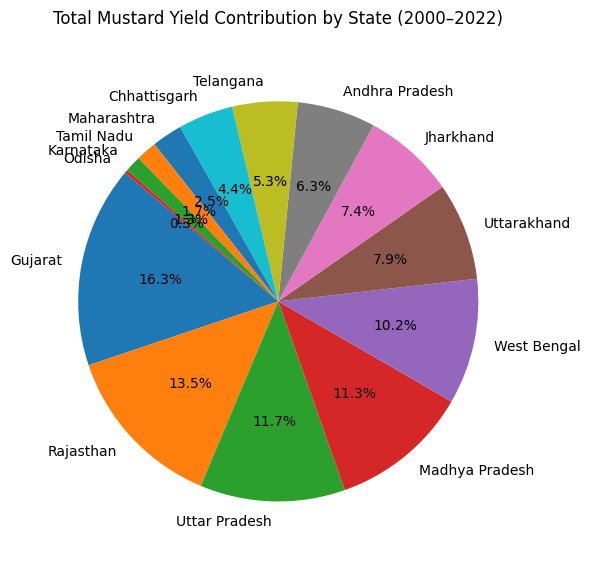

In [ ]:
state_yield_sum_mustard = df_filtered_mustard.groupby('state_name')['yield'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(state_yield_sum_mustard, labels=state_yield_sum_mustard.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Mustard Yield Contribution by State (2000–2022)')
plt.axis('equal')
plt.tight_layout()
plt.show()

Gujarat	16.3%
Rajasthan	13.5%
Uttar Pradesh	11.7%
Madhya Pradesh	11.3%
West Bengal	10.2%
Uttarakhand	7.9%
\
These 6 states together account for ~71% of total mustard yield.

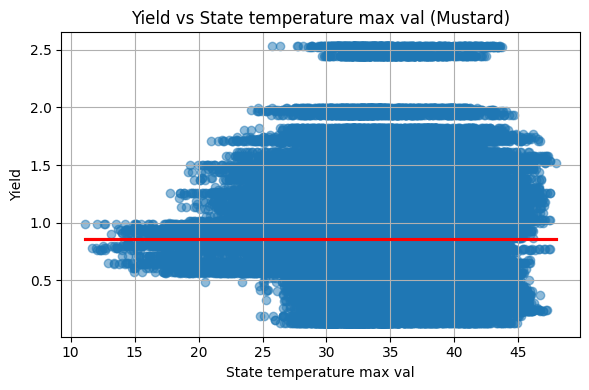

Correlation between state_temperature_max_val and yield: -0.000


In [ ]:
# Define feature and target
mustard_feature_col = 'state_temperature_max_val'
mustard_target_col = 'yield'

# Drop missing values
df_temp_yield = df_mustard[[mustard_feature_col, mustard_target_col]].dropna()

# Scatter + Regression Line
plt.figure(figsize=(6, 4))
sns.regplot(x=mustard_feature_col, y=mustard_target_col, data=df_temp_yield,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title(f'{mustard_target_col.capitalize()} vs {mustard_feature_col.replace("_", " ").capitalize()} (Mustard)')
plt.xlabel(mustard_feature_col.replace('_', ' ').capitalize())
plt.ylabel(mustard_target_col.capitalize())
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = df_temp_yield[mustard_feature_col].corr(df_temp_yield[mustard_target_col])
print(f"Correlation between {mustard_feature_col} and {mustard_target_col}: {correlation:.3f}")


Text(0.5, 1.0, 'Lowess Smoothed: Max Temp vs Yield (Mustard)')

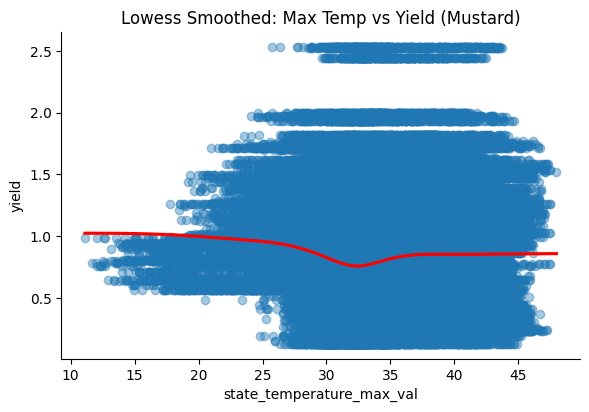

In [ ]:
sns.lmplot(x=mustard_feature_col, y=mustard_target_col, data=df_temp_yield,
           lowess=True, height=4, aspect=1.5, scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
plt.title('Lowess Smoothed: Max Temp vs Yield (Mustard)')


->The red curve (Lowess) is almost flat, except for a small dip between ~28°C to 35°C.
This suggests:
For most temperature ranges, max temperature has minimal effect on yield.
There’s a slight yield dip in the 30–35°C range, but it’s not very strong or consistent.

->Mustard yield appears to be resilient to temperature variations (up to a point).
Yield doesn’t increase with temperature, nor does it strongly decrease — indicating other factors (like rainfall, soil, or irrigation) likely dominate.

Text(0.5, 1.0, 'Lowess Smoothed: Min Temp vs Yield (Mustard)')

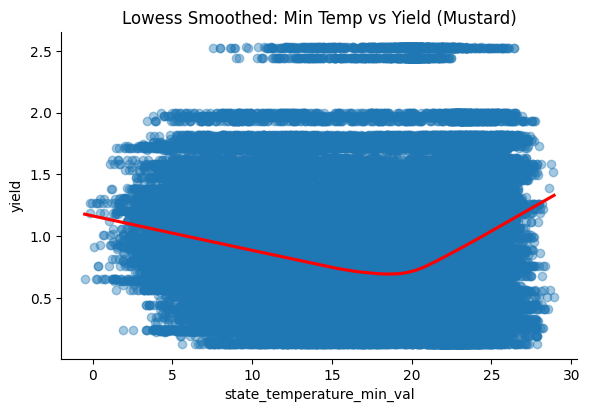

In [ ]:
sns.lmplot(x='state_temperature_min_val', y='yield', data=df_mustard.dropna(),
           lowess=True, height=4, aspect=1.5, scatter_kws={'alpha':0.4}, line_kws={'color': 'red'})
plt.title('Lowess Smoothed: Min Temp vs Yield (Mustard)')

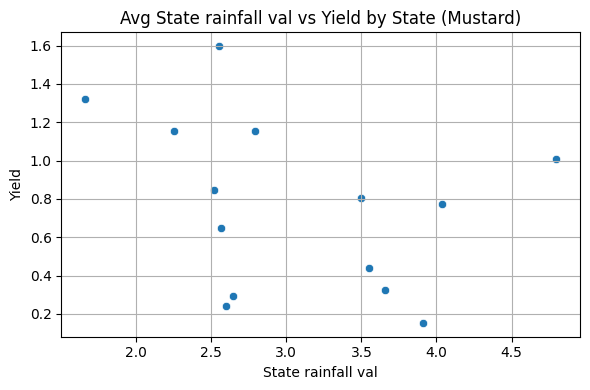

Correlation between state_rainfall_val and yield: -0.340


In [ ]:
# Define feature and target
mustard_feature_col2= 'state_rainfall_val'
mustard_target_col = 'yield'

# Group by state and get averages
state_avg = df_mustard.groupby('state_name')[[mustard_feature_col2, mustard_target_col]].mean().dropna()

# Scatter plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x=mustard_feature_col2, y=mustard_target_col, data=state_avg)
plt.title(f'Avg {mustard_feature_col2.replace("_", " ").capitalize()} vs {mustard_target_col.capitalize()} by State (Mustard)')
plt.xlabel(mustard_feature_col2.replace('_', ' ').capitalize())
plt.ylabel(mustard_target_col.capitalize())
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation
correlation = state_avg[mustard_feature_col2].corr(state_avg[mustard_target_col])
print(f"Correlation between {mustard_feature_col2} and {mustard_target_col}: {correlation:.3f}")


Negative → excess rain may hurt mustard production.

In [ ]:
states_must = df_mustard['state_name'].unique()
state_scores_must = []
for state in states_must:
    state_df_must = df_mustard[df_mustard['state_name'] == state].dropna()

    # Define features and target
    X_must = state_df_must[['state_temperature_max_val','state_temperature_min_val','state_rainfall_val','FRL','Live Cap FRL','Current Live Storage','Level']]
    y_must = state_df_must['yield']

    # Split and scale
    X_train_must, X_test_must, y_train_must, y_test_must = train_test_split(X_must, y_must, test_size=0.2, random_state=42)
    scaler_must = StandardScaler()
    scaler_y_must=MinMaxScaler()

    X_train_scaled_must = scaler_must.fit_transform(X_train_must)
    X_test_scaled_must = scaler_must.transform(X_test_must)
    y_train_scaled_must = scaler_y_must.fit_transform(y_train_must.values.reshape(-1, 1))

In [ ]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop

def build_model(hp):
    model_must = Sequential()

    # Number of hidden layers (1 to 3)
    for i in range(hp.Int('num_layers', 1, 3)):
        units_must = hp.Int(f'units_{i}', min_value=32, max_value=512, step=32)
        activation_must = hp.Choice(f'act_{i}', ['relu', 'tanh', 'selu'])

        model_must.add(Dense(units=units_must, activation=activation_must))

        if hp.Boolean(f'dropout_{i}'):
            model_must.add(Dropout(rate=hp.Float(f'dropout_rate_{i}', 0.1, 0.5, step=0.1)))

    # Output layer
    model_must.add(Dense(1))

    # Choose optimizer and learning rate
    optimizer_choice_must = hp.Choice('optimizer', ['adam', 'rmsprop'])
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    if optimizer_choice_must == 'adam':
        optimizer_must = Adam(learning_rate=lr)
    else:
        optimizer_must = RMSprop(learning_rate=lr)

    model_must.compile(optimizer=optimizer_must, loss='mse', metrics=['mae'])
    return model_must

In [ ]:
tuner_must = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='ann_tuning_mustard',
    project_name='yield_model_mustard',
    overwrite=True
)

In [ ]:
tuner_must.search(X_train_scaled_must, y_train_scaled_must,
             epochs=50,
             validation_split=0.2,
             batch_size=32,
             verbose=1)



Trial 10 Complete [00h 02m 15s]
val_loss: 0.09101134538650513

Best val_loss So Far: 0.054399045184254646
Total elapsed time: 00h 17m 16s


In [ ]:
best_hp_must = tuner_must.get_best_hyperparameters(1)[0]
print("Best hyperparameters:")
for key in best_hp_must.values.keys():
    print(f"{key}: {best_hp_must.get(key)}")

Best hyperparameters:
num_layers: 3
units_0: 96
act_0: tanh
dropout_0: False
optimizer: rmsprop
learning_rate: 0.0017202351384356584
units_1: 32
act_1: relu
dropout_1: False
units_2: 32
act_2: relu
dropout_2: False


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
state_scores_must = []
for state in states_must:
    # Define the model
    model_must = Sequential()

# Layer 0
    model_must.add(Dense(128, activation='relu',input_shape=(X_train_scaled_must.shape[1],)))
    model_must.add(BatchNormalization())
    #model_must.add(LeakyReLU(alpha=0.1))
    #model_must.add(Dropout(0.2))          # dropout_0: True

# Layer 1
    model_must.add(Dense(64, activation='relu'))
    model_must.add(BatchNormalization())
    #model_must.add(LeakyReLU(alpha=0.1))
    #model_must.add(Dropout(0.2))          # dropout_1: True
# Layer 2
    model_must.add(Dense(32, activation='relu'))
    model_must.add(BatchNormalization())
    #model_must.add(Dropout(0.1))


# Output layer
    model_must.add(Dense(1, activation='linear'))

# Optimizer
    optimizer = Adam(learning_rate=0.0017202351384356584)
    model_must.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

# Callbacks
    early_stop = EarlyStopping(monitor='val_loss', patience=15, min_delta=1e-4, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# Train the model
    history_must = model_must.fit(
      X_train_scaled_must, y_train_scaled_must,
      epochs=150,
      batch_size=32,
      validation_split=0.2,
      callbacks=[early_stop, reduce_lr],
      verbose=1
)

    y_pred_scaled_must = model_must.predict(X_test_scaled_must)
    y_pred_must = scaler_y_must.inverse_transform(y_pred_scaled_must)
    rmse_must = np.sqrt(mean_squared_error(y_test_must, y_pred_must))
    r2_must = r2_score(y_test_must, y_pred_must)
    actual_mean_must = y_test_must .mean()
    predicted_mean_must = np.mean(y_pred_must)

    print(f"State: {state} | RMSE: {rmse_must:.2f} | R²: {r2_must:.3f}")
    state_scores_must.append({
        'State': state,
        'RMSE': rmse_must,
        'R2': r2_must,
        'Actual_Yield': actual_mean_must,
        'Predicted_Yield': predicted_mean_must,
    })

Epoch 1/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.3587 - mae: 0.4403 - val_loss: 0.1280 - val_mae: 0.2903 - learning_rate: 0.0017
Epoch 2/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0934 - mae: 0.2517 - val_loss: 0.1112 - val_mae: 0.2733 - learning_rate: 0.0017
Epoch 3/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0874 - mae: 0.2443 - val_loss: 0.0915 - val_mae: 0.2592 - learning_rate: 0.0017
Epoch 4/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0843 - mae: 0.2395 - val_loss: 0.0834 - val_mae: 0.2404 - learning_rate: 0.0017
Epoch 5/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0838 - mae: 0.2388 - val_loss: 0.0802 - val_mae: 0.2360 - learning_rate: 0.0017
Epoch 6/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0836 - mae: 0.2402 - val_loss: 0.0811 - val_mae: 0.2364 - learning_rate: 0.0017
Epoch 7/150
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0756 - mae: 0.2275 - val_loss: 0.0778 - val_mae: 0.2306 - learning_rate: 0.0017

In [ ]:
final_results_df_must = pd.DataFrame(state_scores_must)
print(final_results_df_must)

             State      RMSE        R2  Actual_Yield  Predicted_Yield
0   Andhra Pradesh  0.101283  0.599801      1.005127         1.008512
1     Chhattisgarh  0.101428  0.598657      1.005127         1.007828
2          Gujarat  0.100532  0.605717      1.005127         1.006918
3        Jharkhand  0.103643  0.580935      1.005127         1.010761
4        Karnataka  0.107010  0.553264      1.005127         1.010048
5   Madhya Pradesh  0.101867  0.595172      1.005127         1.008000
6      Maharashtra  0.103451  0.582483      1.005127         1.010151
7           Odisha  0.110256  0.525750      1.005127         1.003147
8        Rajasthan  0.101753  0.596080      1.005127         1.007936
9       Tamil Nadu  0.101185  0.600578      1.005127         1.009654
10       Telangana  0.109852  0.529218      1.005127         1.012311
11     Uttarakhand  0.102576  0.589514      1.005127         1.007313
12   Uttar Pradesh  0.102231  0.592277      1.005127         1.006058
13     West Bengal  

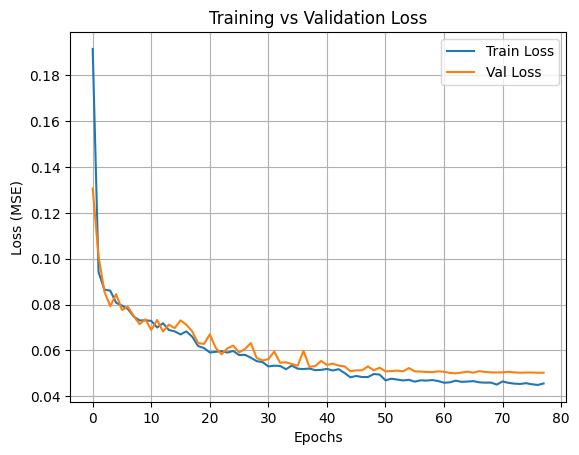

In [ ]:
plt.plot(history_must.history['loss'], label='Train Loss')
plt.plot(history_must.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()